# Project 4: Visualizing Monetary Policy

## Goals:

1. Create functions in separate py files. Save those files in a folder and import the files and their functions from the folder.
2. Download data from FRED. This includes aligning units so all data uses the same measures (i.e., billions or millions of dollars
3. Visualize the data using line graphs and stacked plots

In [1]:
#plots.py

# os module allows you to access commandline functions
# from python
import os
import pandas as pd
# math and data library
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40,20),
                    save_fig = False, pp = None):
    # gather variables from df
    plot_vars = list(df.keys())
    for x in plot_vars:
        for y in plot_vars:
            if x != y:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Years will be represented by color
                # Years will be the c value
                if "Year" not in df.keys():
                    # create list from index
                    # convert each index value to string
                    # only include first 4 characters, which is the year
                    # create an integer from those charcters
                    df["Year"] =[int(str(ind)[:4]) for ind in df.index]
                
                df.plot.scatter(x = x, y = y, s = s, ax=ax,
                                c = "Year", cmap = "viridis")
               
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis = "x", rotation=90)
                # get rid of tick lines
                ax.tick_params("both", length = 0, which="both")
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    # identify directory to save figure
                    directory = "plots/" + x[:12] + " " + y[:12] + " c=Year"
                    plt.savefig(directory.replace(":", "-") + ".png")
                if pp != None: pp.savefig(fig, bbox_inches = "tight")

Next, we create a function to download data from FRED using pandas_datareader.

In [2]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, 
                end = datetime.datetime.today(),freq = "A"):
    # check if new column is first column of data
    # if true, then create a new dataframe
    i = 0
    for key, code in data_codes.items():
        if i == 0:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            # rename column so that code is replaced by the key (variable name)
            df.rename(columns = {code:key}, inplace = True) 
            i = None
        else:
            # if DataFrame exists, add new column
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df
    # if not, add to existing dataframe

<AxesSubplot:xlabel='DATE'>

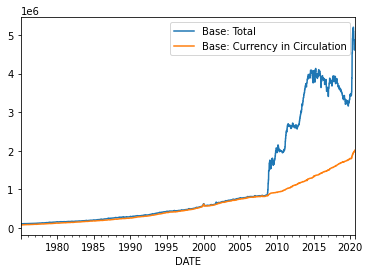

In [3]:
#fedProject.py
from datlib.plots import *
from datlib.FRED import *
# vars in millions of dollars
data_codes = {"Base: Total":"BOGMBASEW",
             "Base: Currency in Circulation":"MBCURRCIRW"}
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start,
                  end = end,
                  freq = "W")
plt.rcParams.update({"font.size":10})
data.plot.line()

In [4]:
data

Base: Total  Base: Currency in Circulation
DATE                                                  
1975-01-12     108920.0                        78943.0
1975-01-19     107891.0                        78245.0
1975-01-26     107988.0                        77505.0
1975-02-02     106358.0                        76749.0
1975-02-09     106061.0                        76530.0
1975-02-16     105693.0                        77119.0
1975-02-23     105663.0                        77358.0
1975-03-02     104951.0                        77031.0
1975-03-09     104932.0                        77087.0
1975-03-16     104989.0                        77804.0
1975-03-23     105865.0                        77981.0
1975-03-30     106235.0                        77901.0
1975-04-06     106438.0                        78175.0
1975-04-13     106196.0                        78518.0
1975-04-20     107106.0                        78854.0
1975-04-27     107373.0                        78565.0
1975-05-04     106697.0                        78221.0
1975-05-11     106617.0                        78520.0
1975-05-18     106443.0                        79233.0
1975-05-25     107578.0                        79351.0
1975-06-01     107045.0                        79602.0
1975-06-08     107627.0                        80010.0
1975-06-15     107298.0                        80672.0
1975-06-22     108771.0                        80910.0
1975-06-29     108829.0                        80820.0
1975-07-06     109581.0                        81205.0
1975-07-13     109318.0                        82027.0
1975-07-20     109780.0                        82281.0
1975-07-27     110055.0                        81862.0
1975-08-03     108955.0                        81405.0
...                 ...                            ...
2020-02-23    3438801.0                      1798507.0
2020-03-01    3438801.0                      1798507.0
2020-03-08    3530453.0                      1808763.0
2020-03-15    3530453.0                      1808763.0
2020-03-22    3884720.0                      1843441.0
2020-03-29    3884720.0                      1843441.0
2020-04-05    4526124.0                      1878945.0
2020-04-12    4526124.0                      1878945.0
2020-04-19    4899202.0                      1887930.0
2020-04-26    4899202.0                      1887930.0
2020-05-03    5068799.0                      1909759.0
2020-05-10    5068799.0                      1909759.0
2020-05-17    5144614.0                      1929498.0
2020-05-24    5144614.0                      1929498.0
2020-05-31    5199813.0                      1947010.0
2020-06-07    5199813.0                      1947010.0
2020-06-14    5085807.0                      1955447.0
2020-06-21    5085807.0                      1955447.0
2020-06-28    4866046.0                      1964259.0
2020-07-05    4866046.0                      1964259.0
2020-07-12    4772522.0                      1976737.0
2020-07-19    4772522.0                      1976737.0
2020-07-26    4609143.0                      1985617.0
2020-08-02    4609143.0                      1985617.0
2020-08-09    4750981.0                      1999857.0
2020-08-16    4750981.0                      1999857.0
2020-08-23    4830999.0                      2009260.0
2020-08-30    4830999.0                      2009260.0
2020-09-06    4876690.0                      2022000.0
2020-09-13    4876690.0                      2022000.0

[2384 rows x 2 columns]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

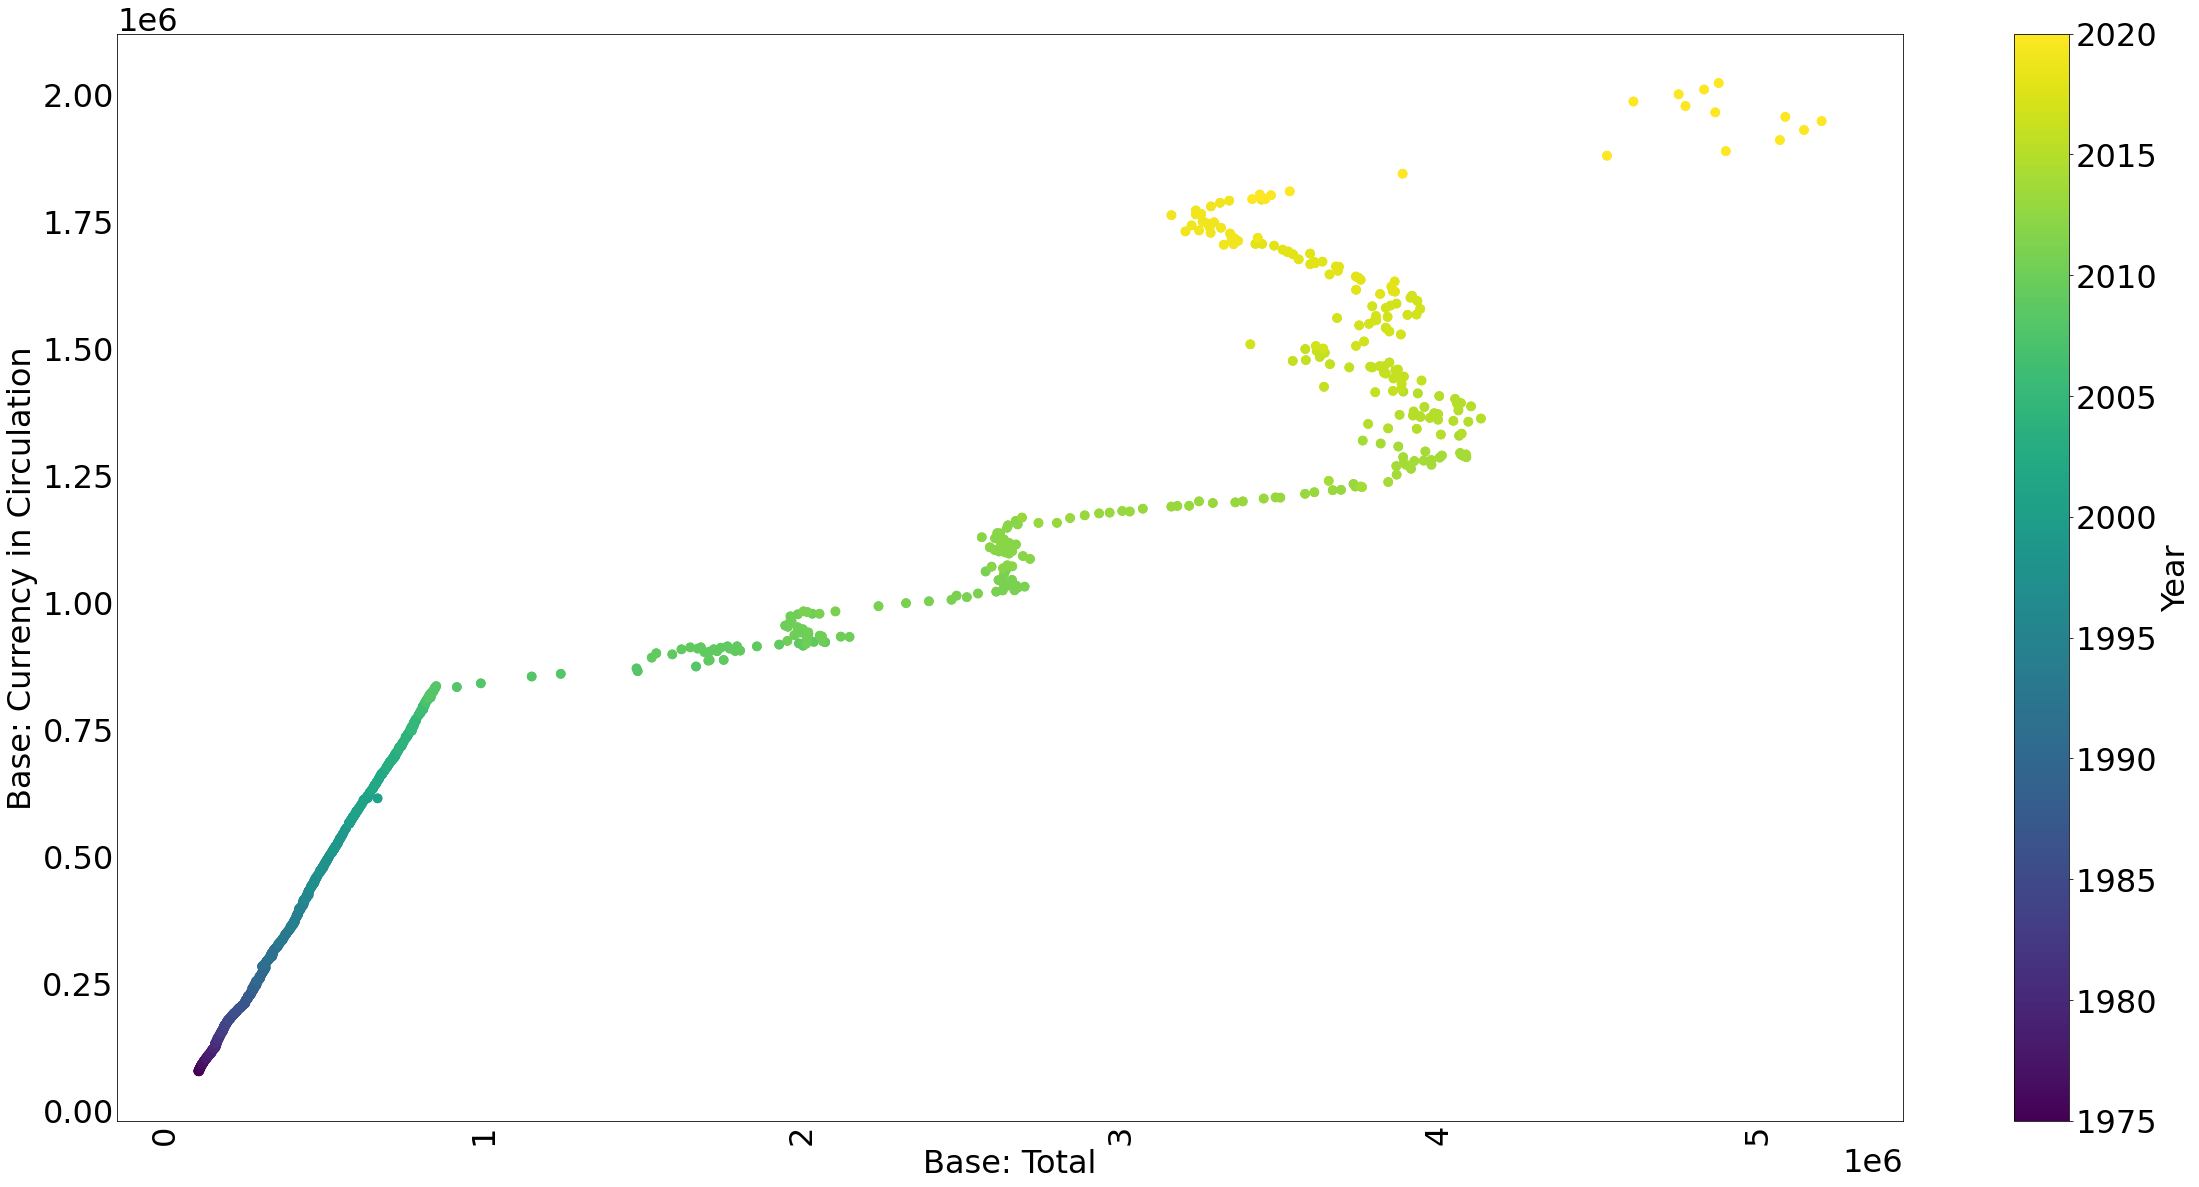

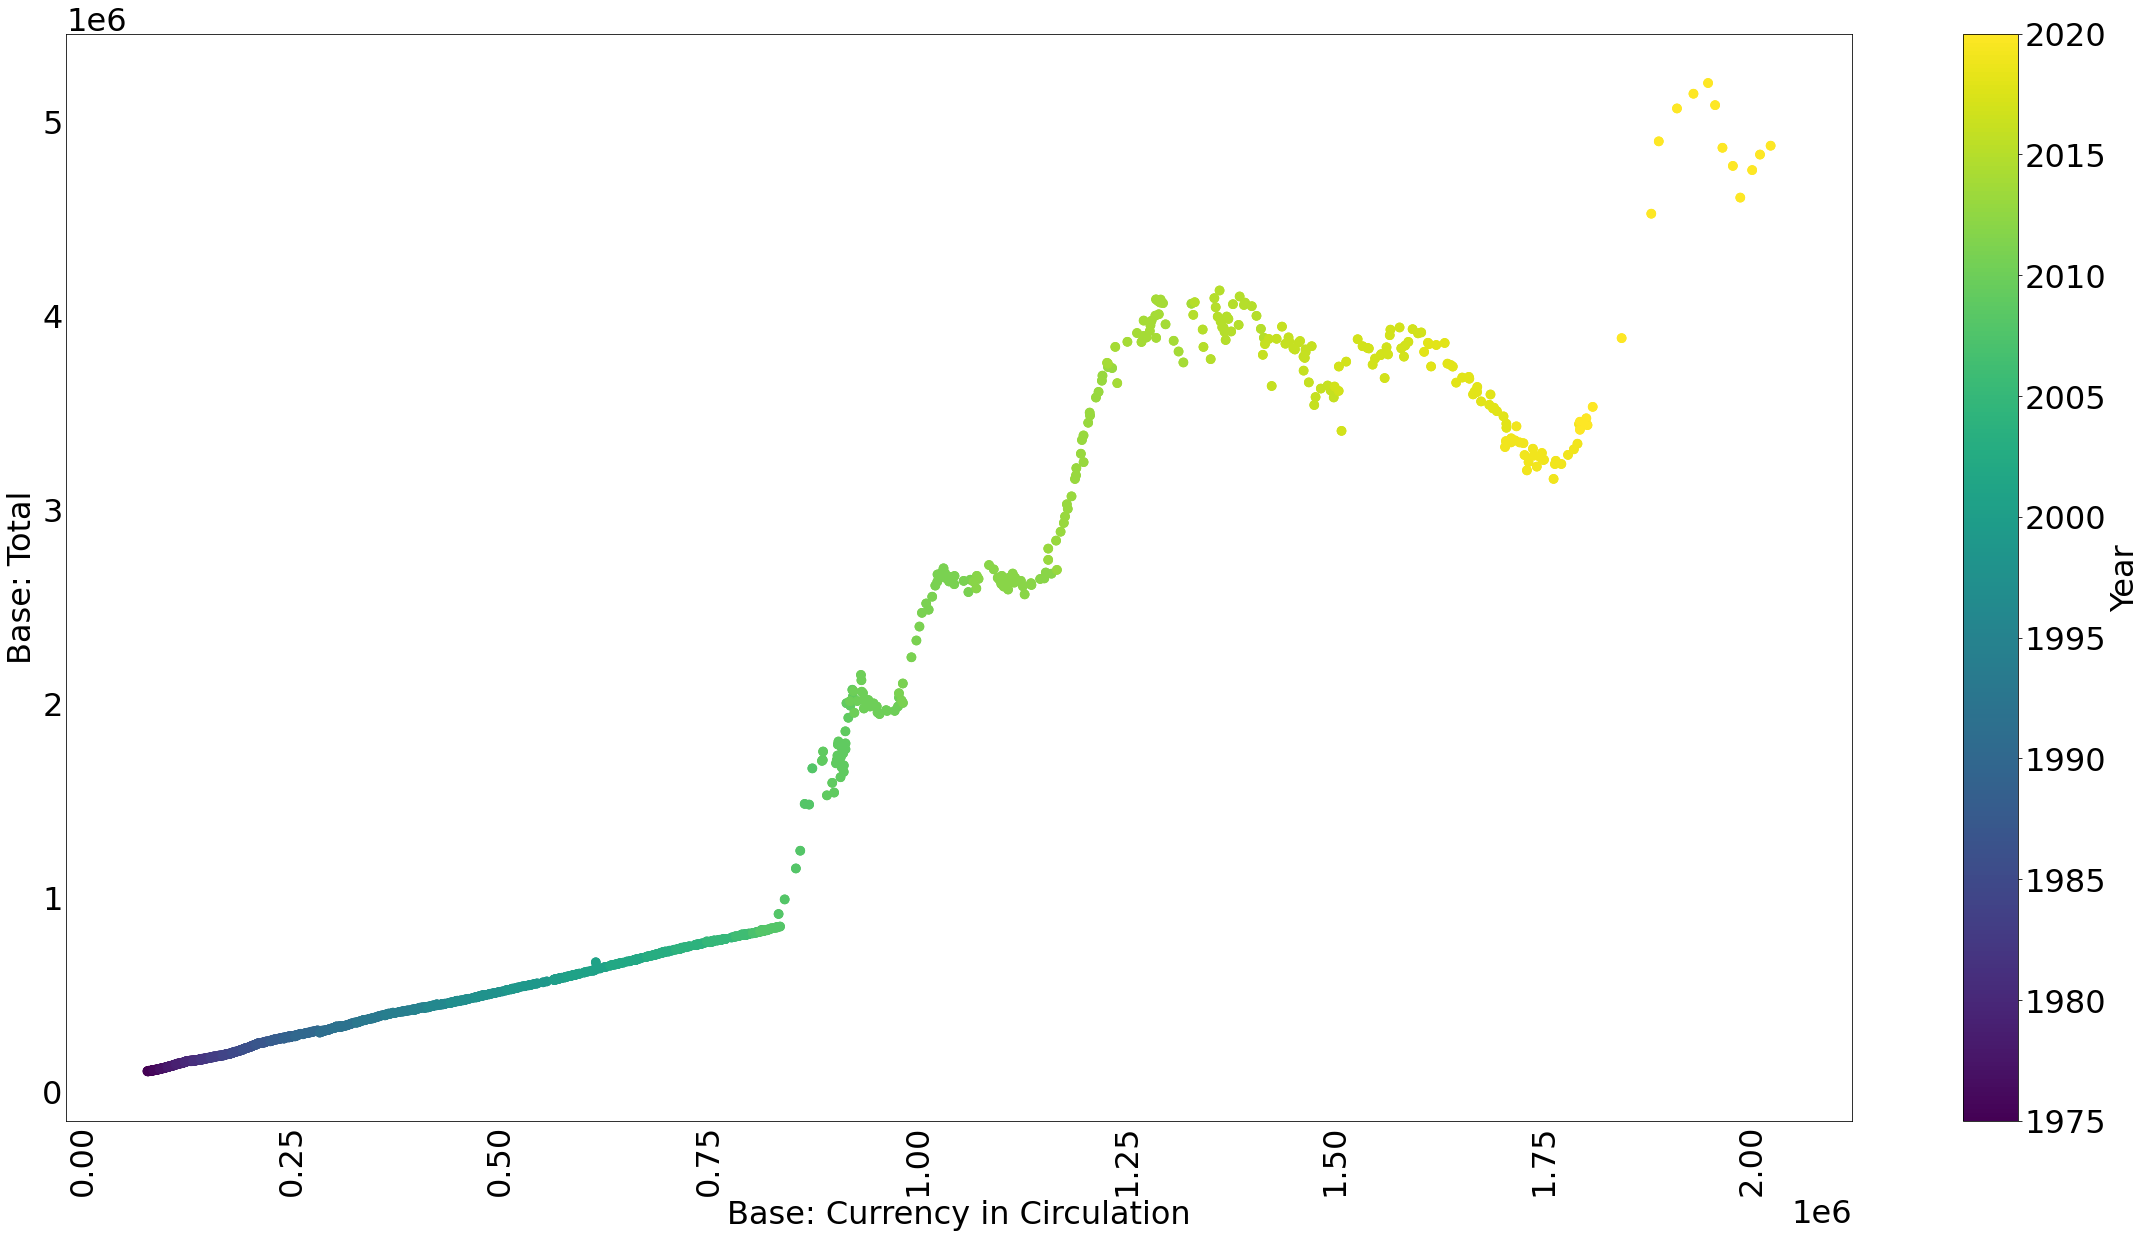

In [5]:
plt.rcParams.update({"font.size":32})
plot_ts_scatter(data)

## Breaking down the Federal Reserve's balance sheet

The Federal Reserve is the central bank of the U.S.. Like all banks, the Fed balance sheet. That balance sheet contains assets and liabilities. 

Traditionally, the Federal Reserve has purchased U.S. Treasuries. 

The Fed has also tended to issue Federal Reserve Notes as liabilities. Now the Federal Reserve offers a variety of deposit accounts that holds as liabilities.

In [6]:
def bil_to_mil(series):
    # multiply billions by 1000 to yield millions
    return series * 10 ** 3

We will use bil_to_mil() function to transform data defined in billions to units of millions.

In [3]:
#fedProject.py
# . . . 
data_codes = {"Base: Total ($ Mil)": "BOGMBASEW",
              "Base: Currency in Circulation ($ Mil)": "MBCURRCIRW",
              
              # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
              
              ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
              
              # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",

              # unamortized value of securities held 
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",

              # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
              # Reserves 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
              ## Major share of depsotis
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
              
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
              
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

start = datetime.datetime(2002, 12, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start,
                  end = end, freq = "M")

In [7]:
bil_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)",
                  "Balance Sheet: Other Deposits ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [8]:
#plots.py

def plot_lines(df, linewidth = 1, figsize = (40,20), 
               legend = True, pp = None):
    fig, ax = plt.subplots(figsize = figsize)
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax, legend = legend)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis="x", rotation=90)
    # get rid of tick lines
    ax.tick_params("both", length=0, which = "both")
    
    vals = ax.get_yticks()
    vals = [int(x) for x in vals]
    ax.set_yticklabels(vals)
    
    # format image filename
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    # avoid cutting off text
    plt.savefig(filename[:50] + "line.png",
               bbox_inches = "tight")
    if pp != None: pp.savefig(fig, box_inches = "tight")

C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\In Class Demonstrations\datlib\plots.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(vals)


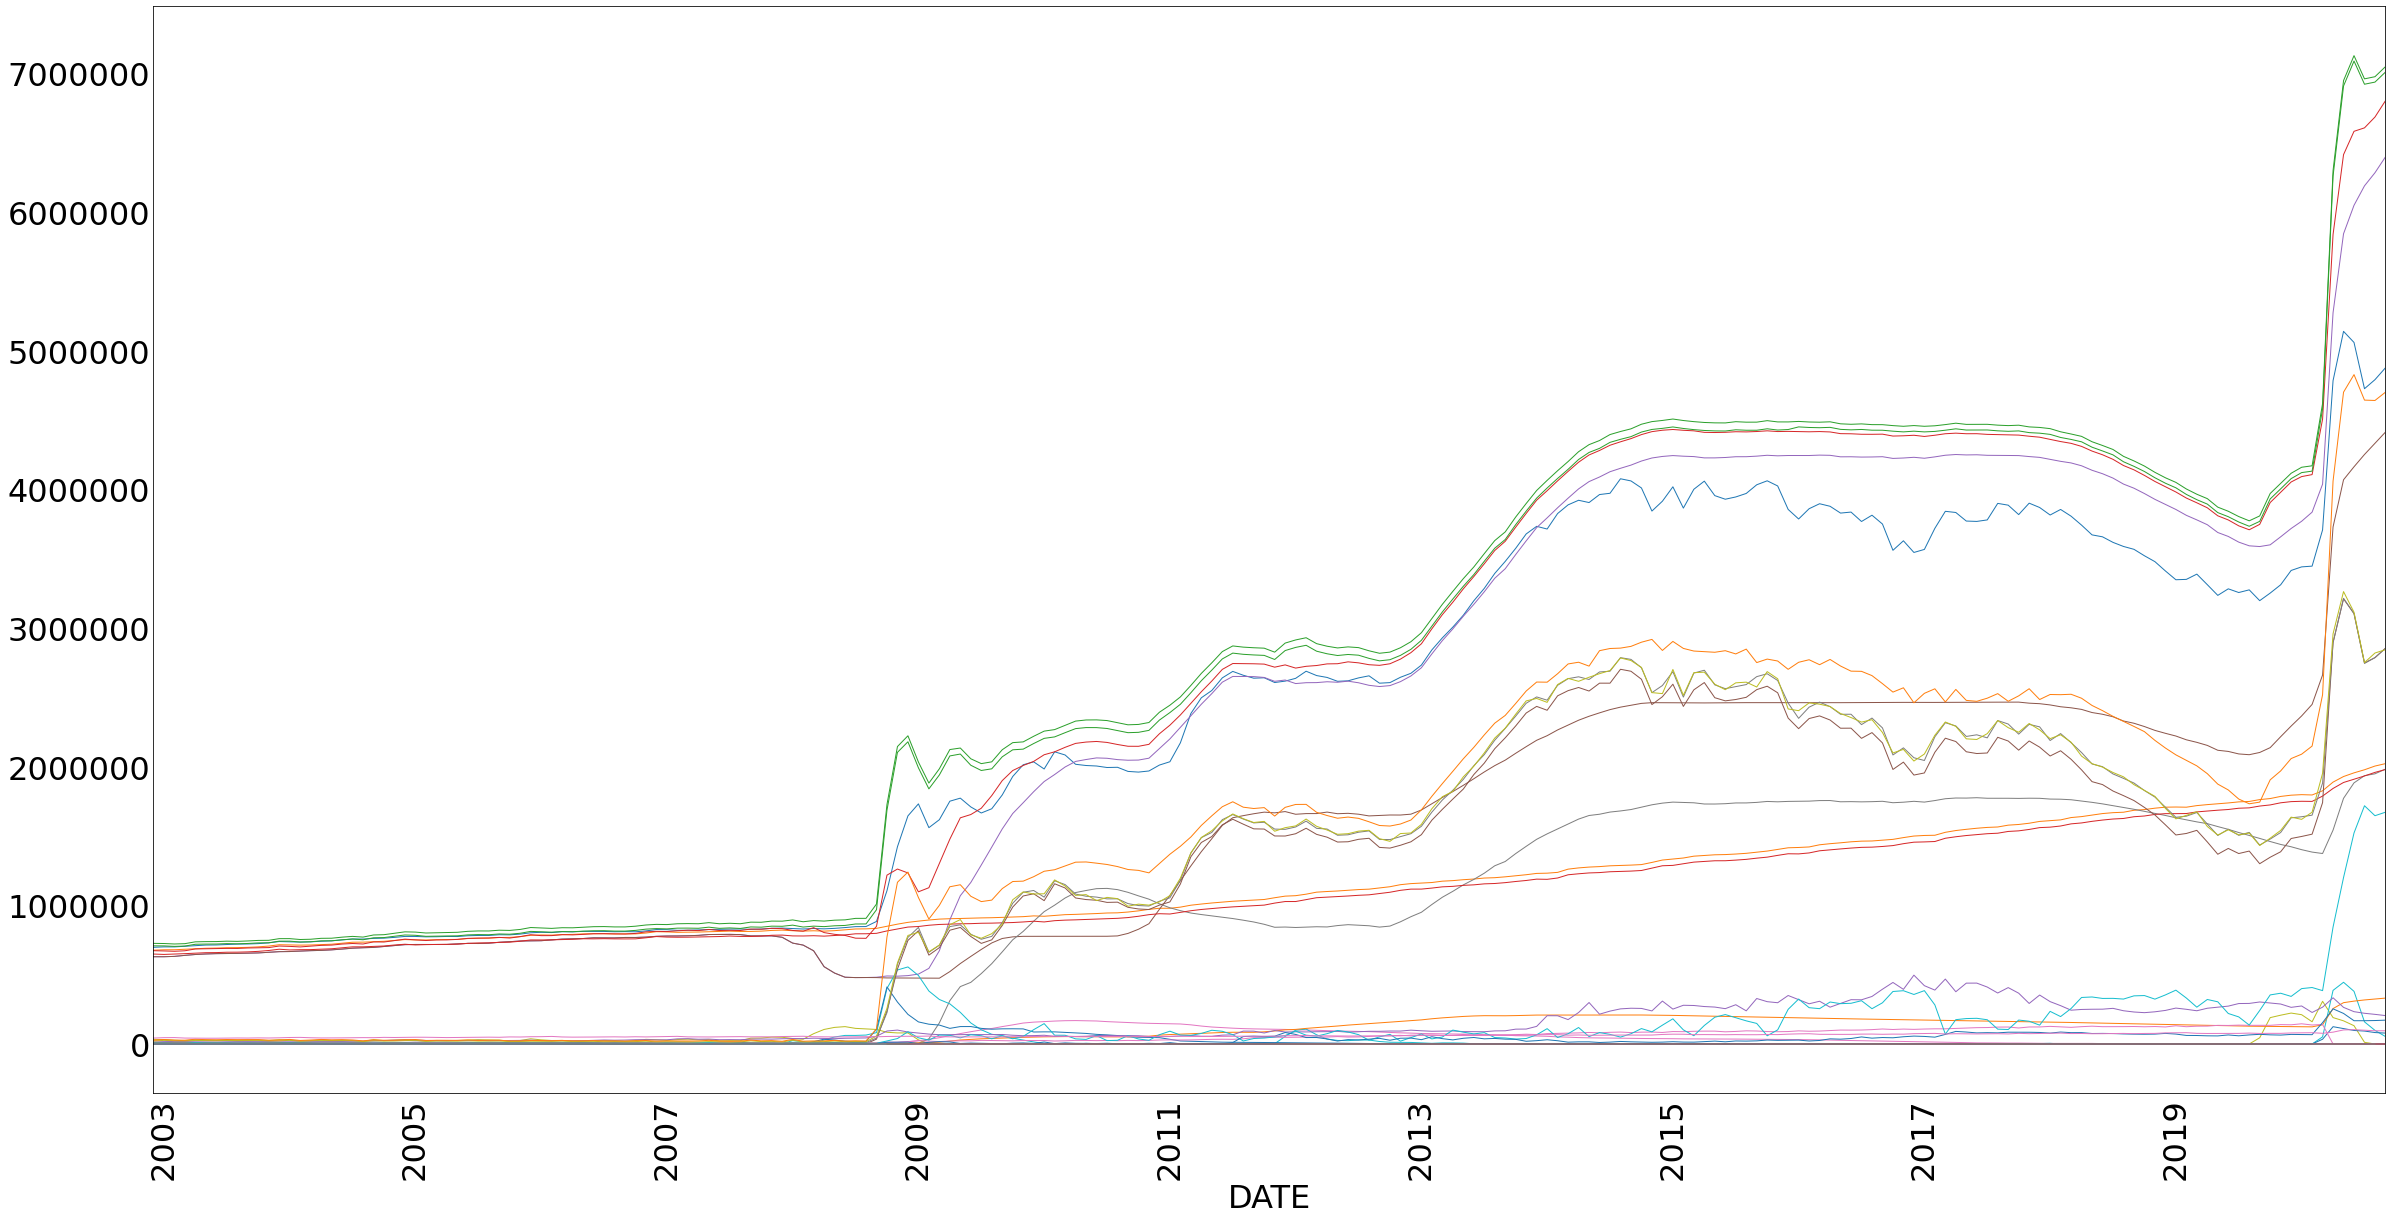

In [11]:
from datlib.plots import *
# fedProject.py
#. . . 
plot_lines(df = data, linewidth = 1, figsize = (40, 20) , pp = None, 
          legend = False)

Next, let's use our plot function to plot them monetary base.

C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\In Class Demonstrations\datlib\plots.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(vals)


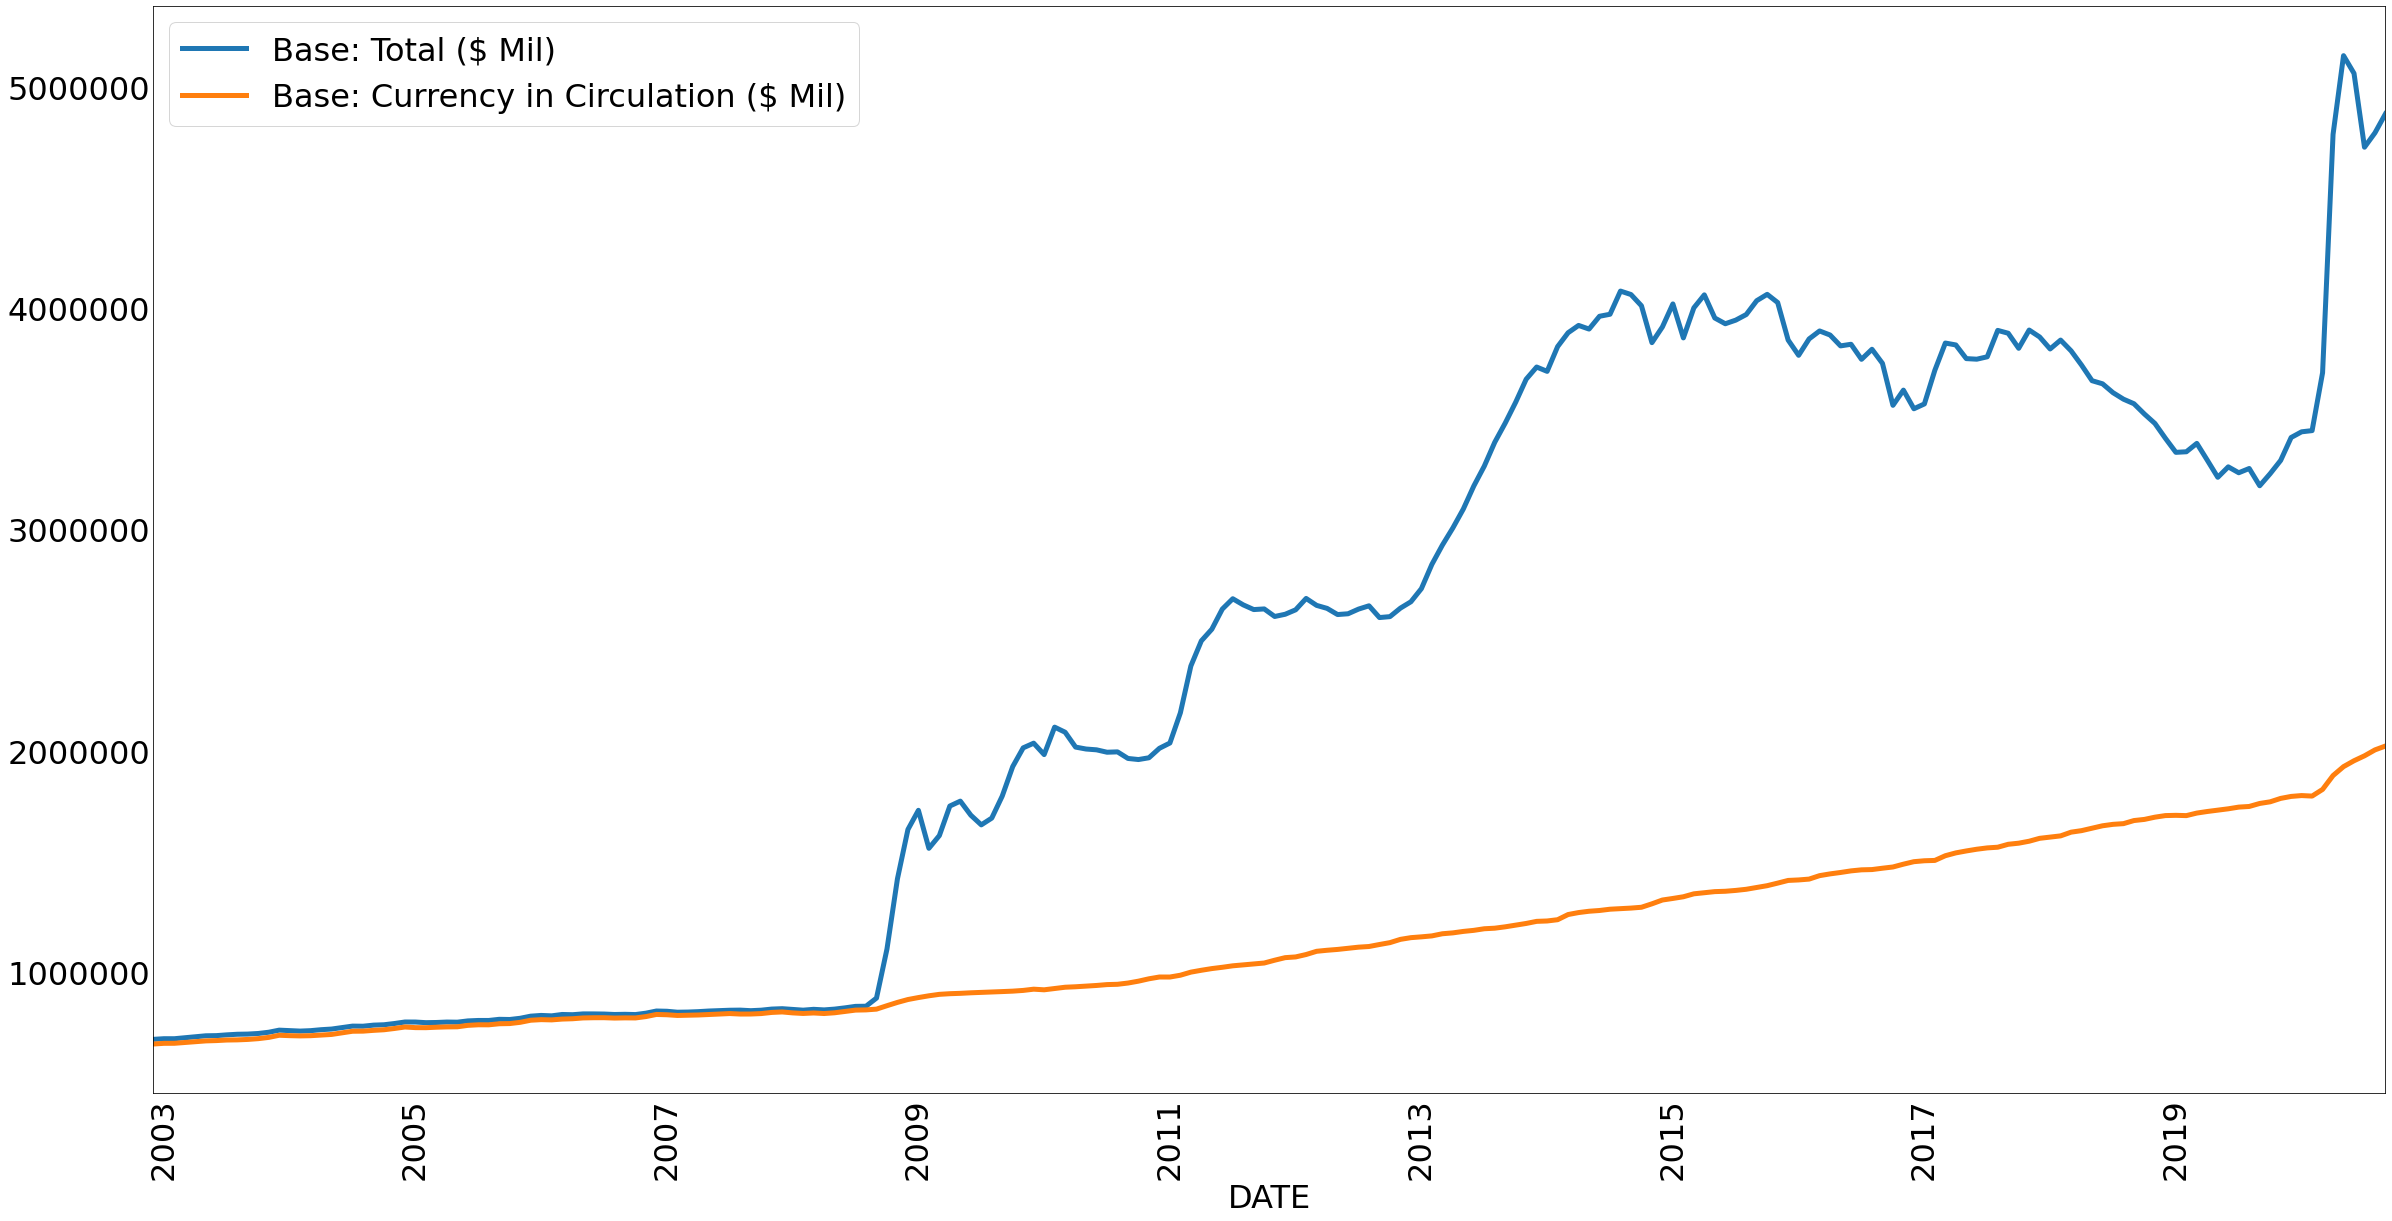

In [12]:
money_vars = ["Base: Total ($ Mil)",
             "Base: Currency in Circulation ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20),
          pp = None)


C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\In Class Demonstrations\datlib\plots.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(vals)


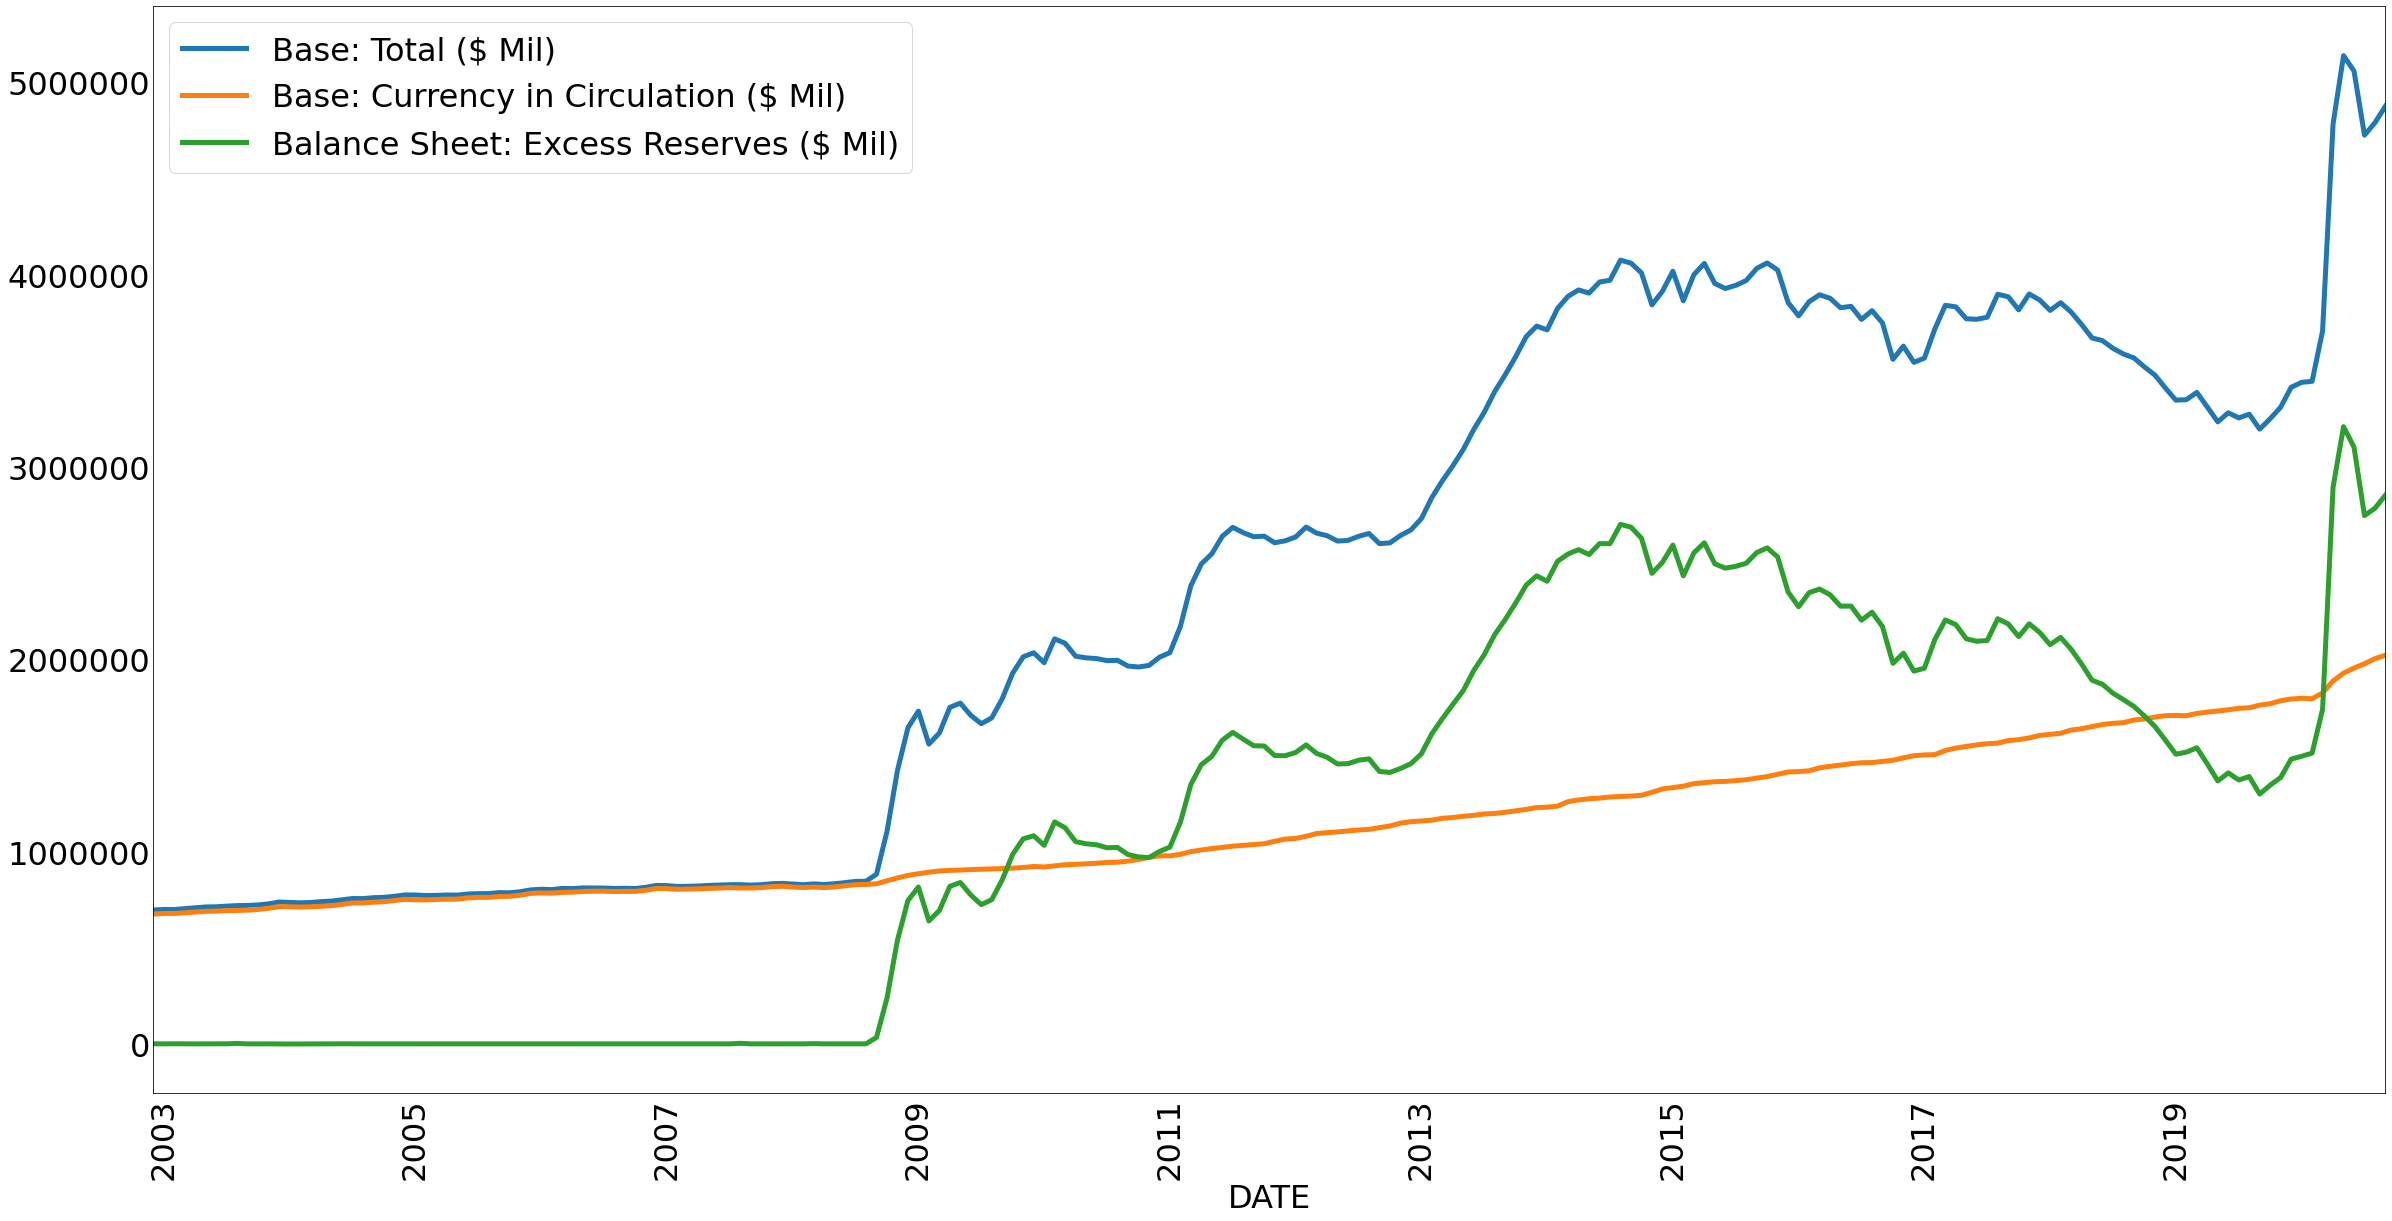

In [13]:
money_vars = ["Base: Total ($ Mil)",
             "Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20),
          pp = None)


## Stacked Plots

You can create plots that stack the area of lines instead of plotting the line relative to zero on the vertical axis

In [33]:
def plot_stacked_lines(df, plot_vars, linewidth = 1, 
                       figsize = (40, 20),
                       pp = None, total_var = False,
                      title = False):
    fig, ax = plt.subplots(figsize = figsize)
    # df.plot.area() created a stacked plot
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth,
                            ax = ax)
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax,
                                c = "k",label = total_var, 
                                ls = "--")
    yticks = ax.get_yticks()
    ax.set_yticklabels(int(y) for y in yticks)
    # place legend in top left corner of plot
    # format legend so that there are two columns of names
    ax.legend(loc = 2, ncol = 2)
    if title != False:
        plt.title(title)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


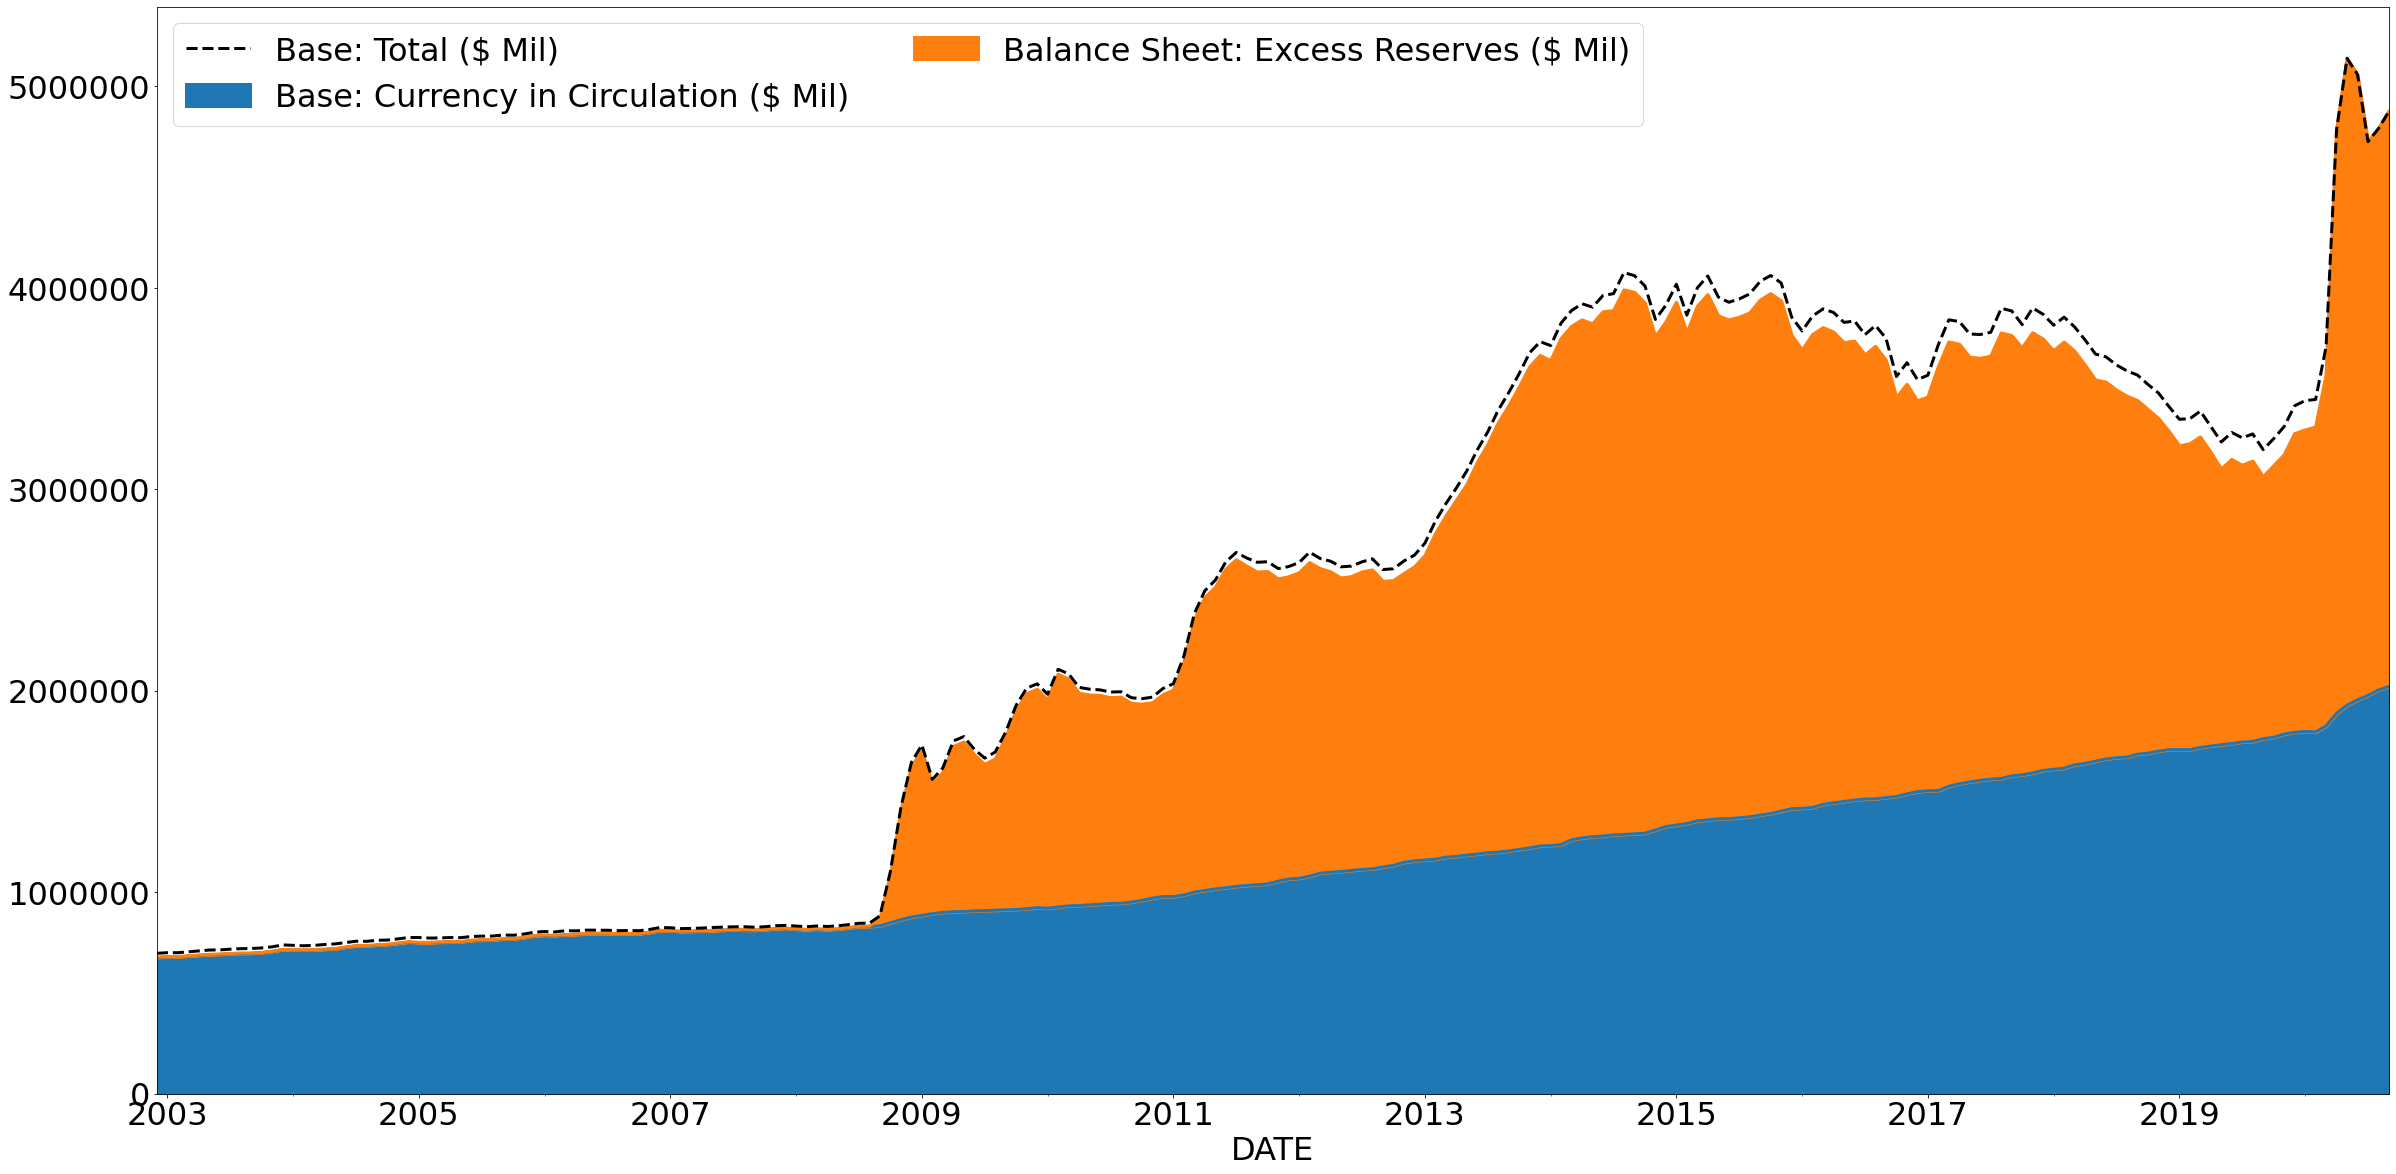

In [34]:
#fedProject.py
# . . . 
# for stacked plot, money_vars selects the variables whose areas
# we will plot
money_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)"]

plot_stacked_lines(data, money_vars, linewidth = 3, 
                   total_var = "Base: Total ($ Mil)")

We can see above plot that the monetary base in the United States is largely divided between currency in circulation and excess reserves whic do not directly support lending. Missing from this plot is required reserves. These are reserves that banks legally must hold as defined by fraction of their total lending.

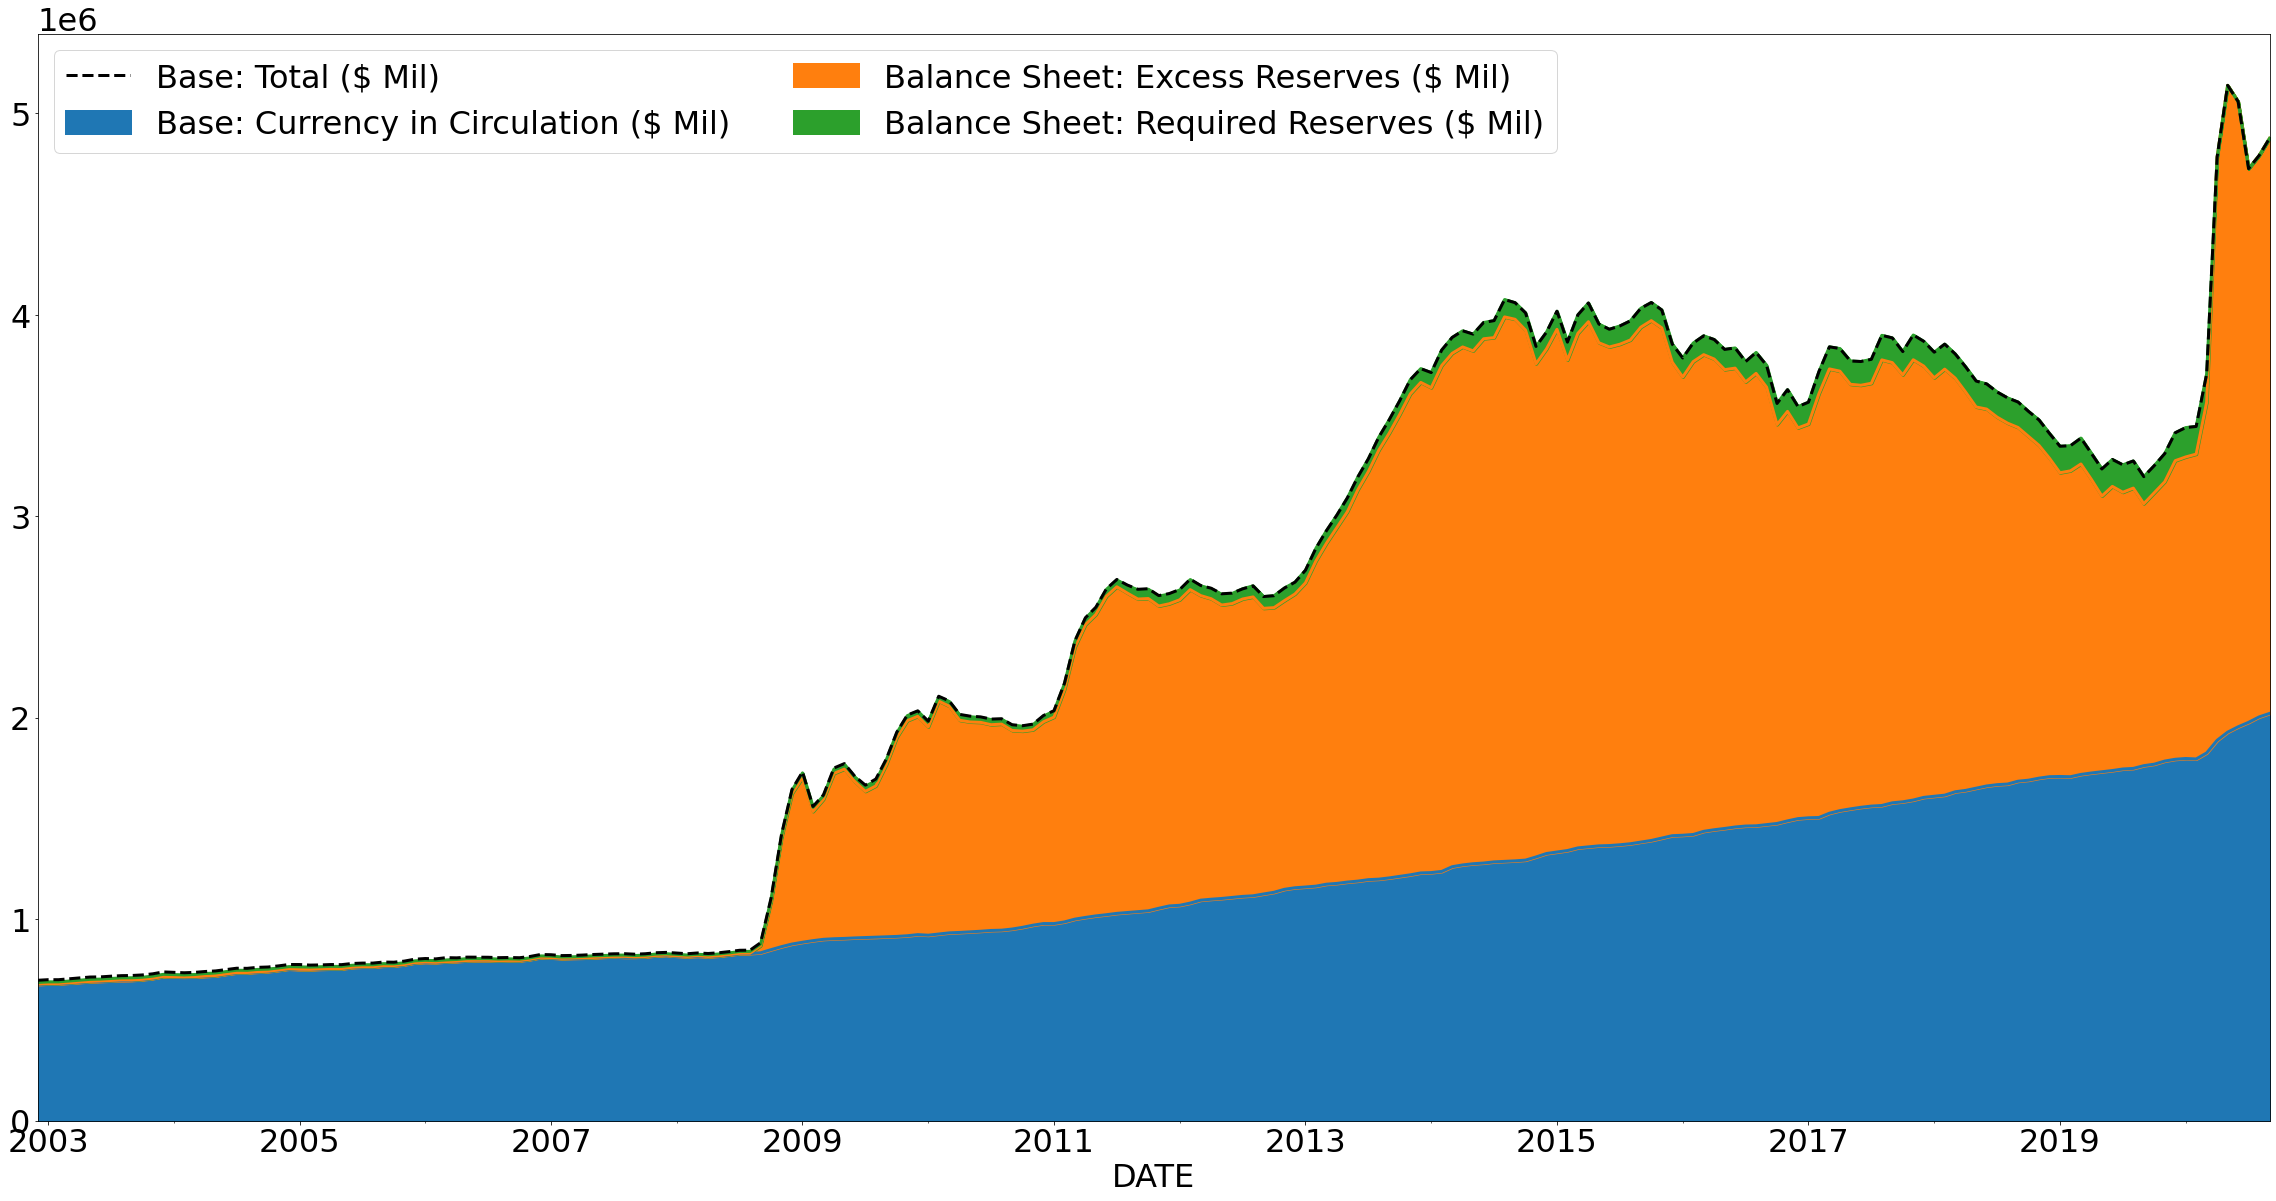

In [16]:
#fedProject.py
# . . . 
# for stacked plot, money_vars selects the variables whose areas
# we will plot
money_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)",
             "Balance Sheet: Required Reserves ($ Mil)"]

plot_stacked_lines(data, money_vars, linewidth = 3, 
                   total_var = "Base: Total ($ Mil)")

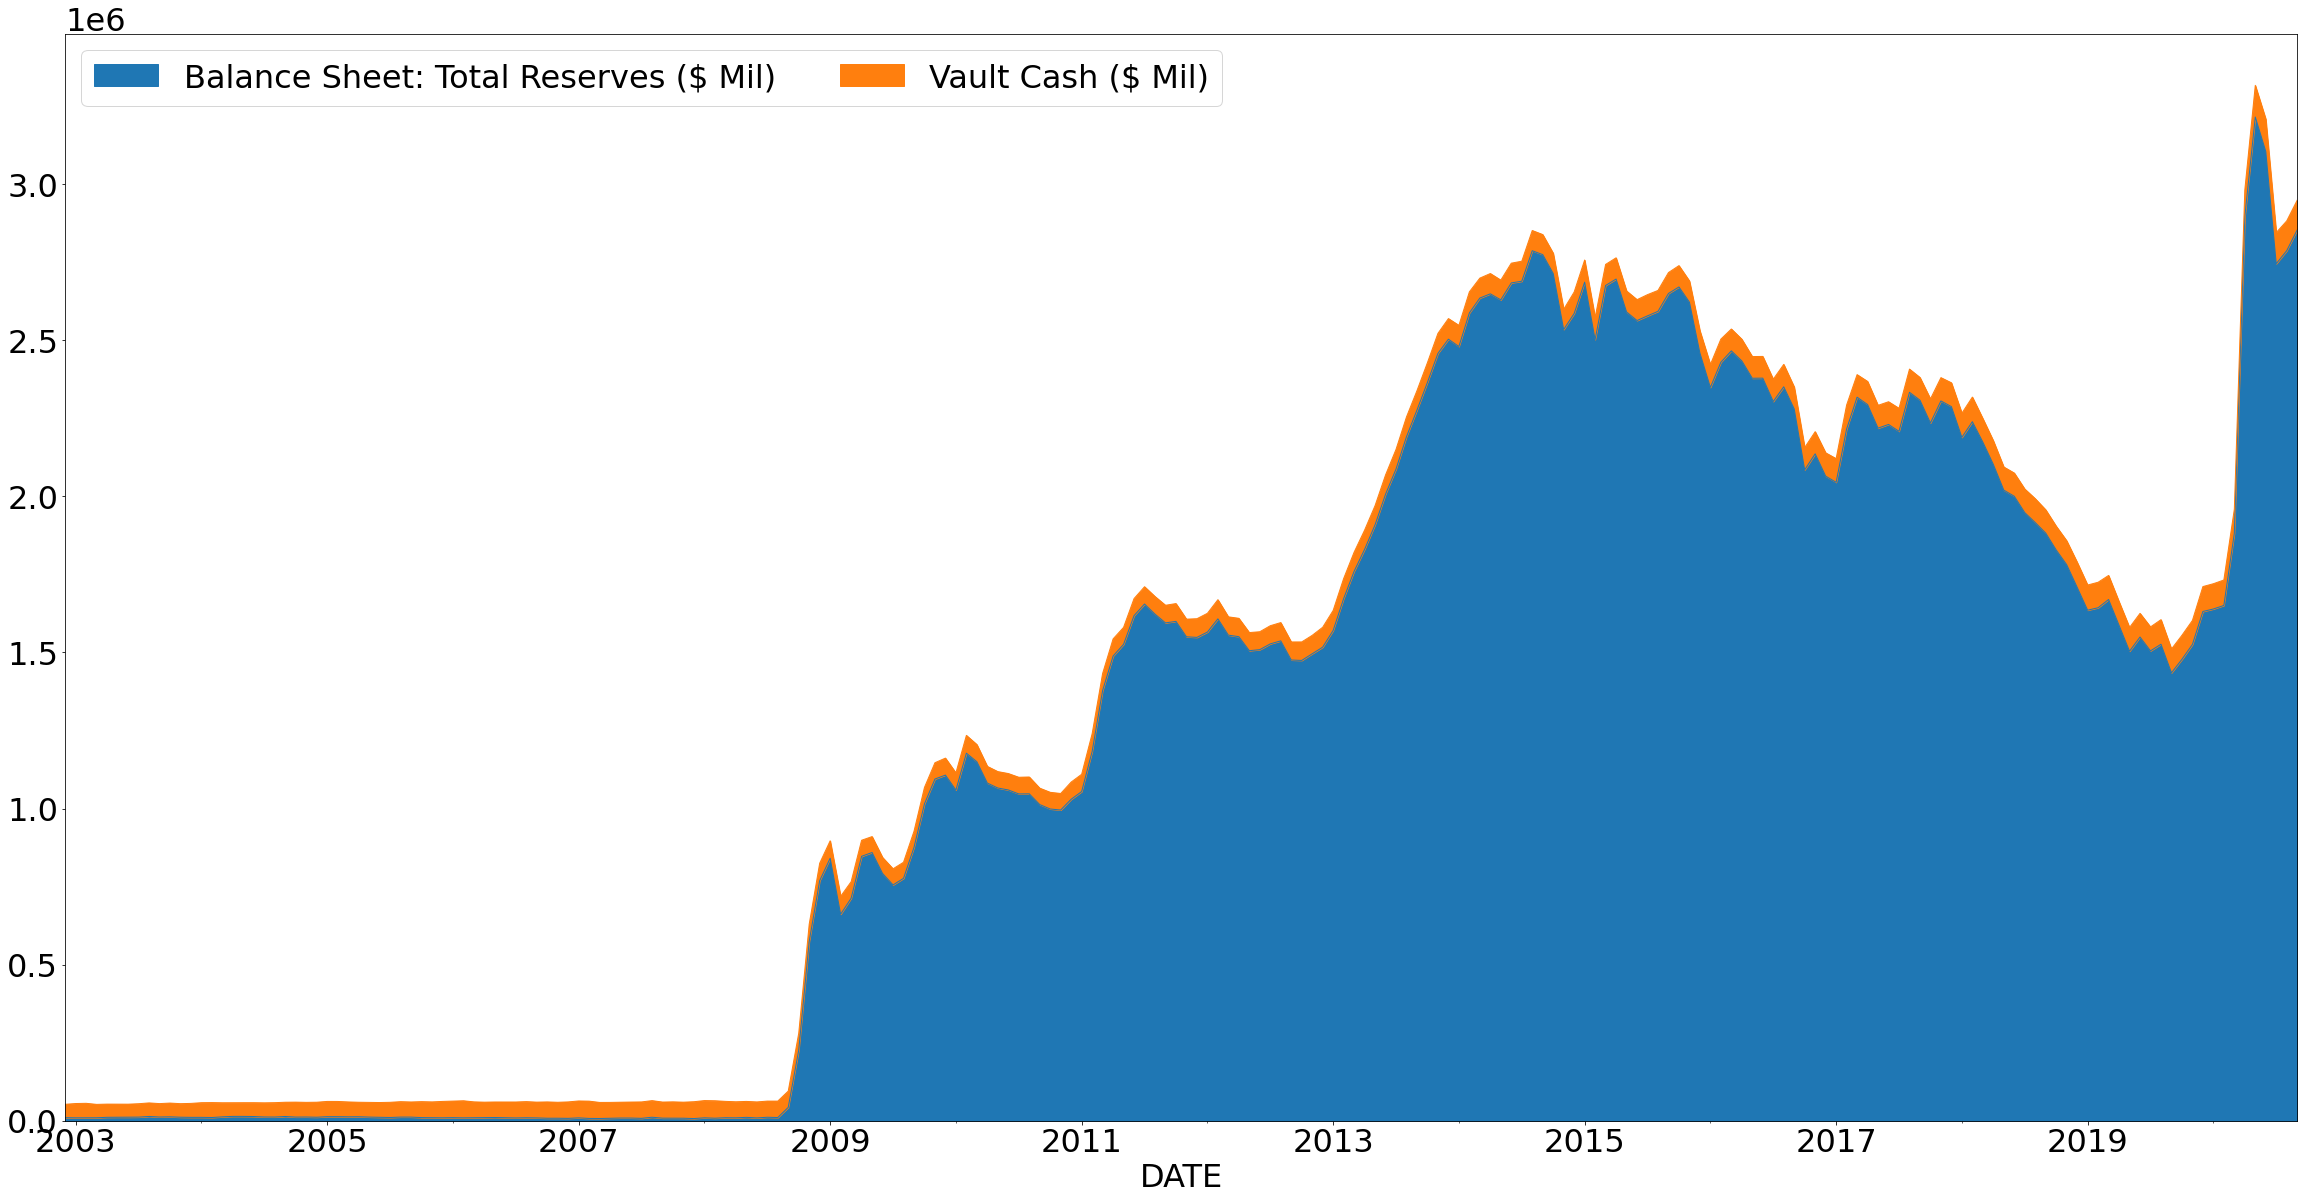

In [17]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
               "Vault Cash ($ Mil)"]
plot_stacked_lines(data, reserve_vars)

Next, let's distinguish between not only excess and required reserves, but also between reserves held at the Fed and reserves held as vault cash.

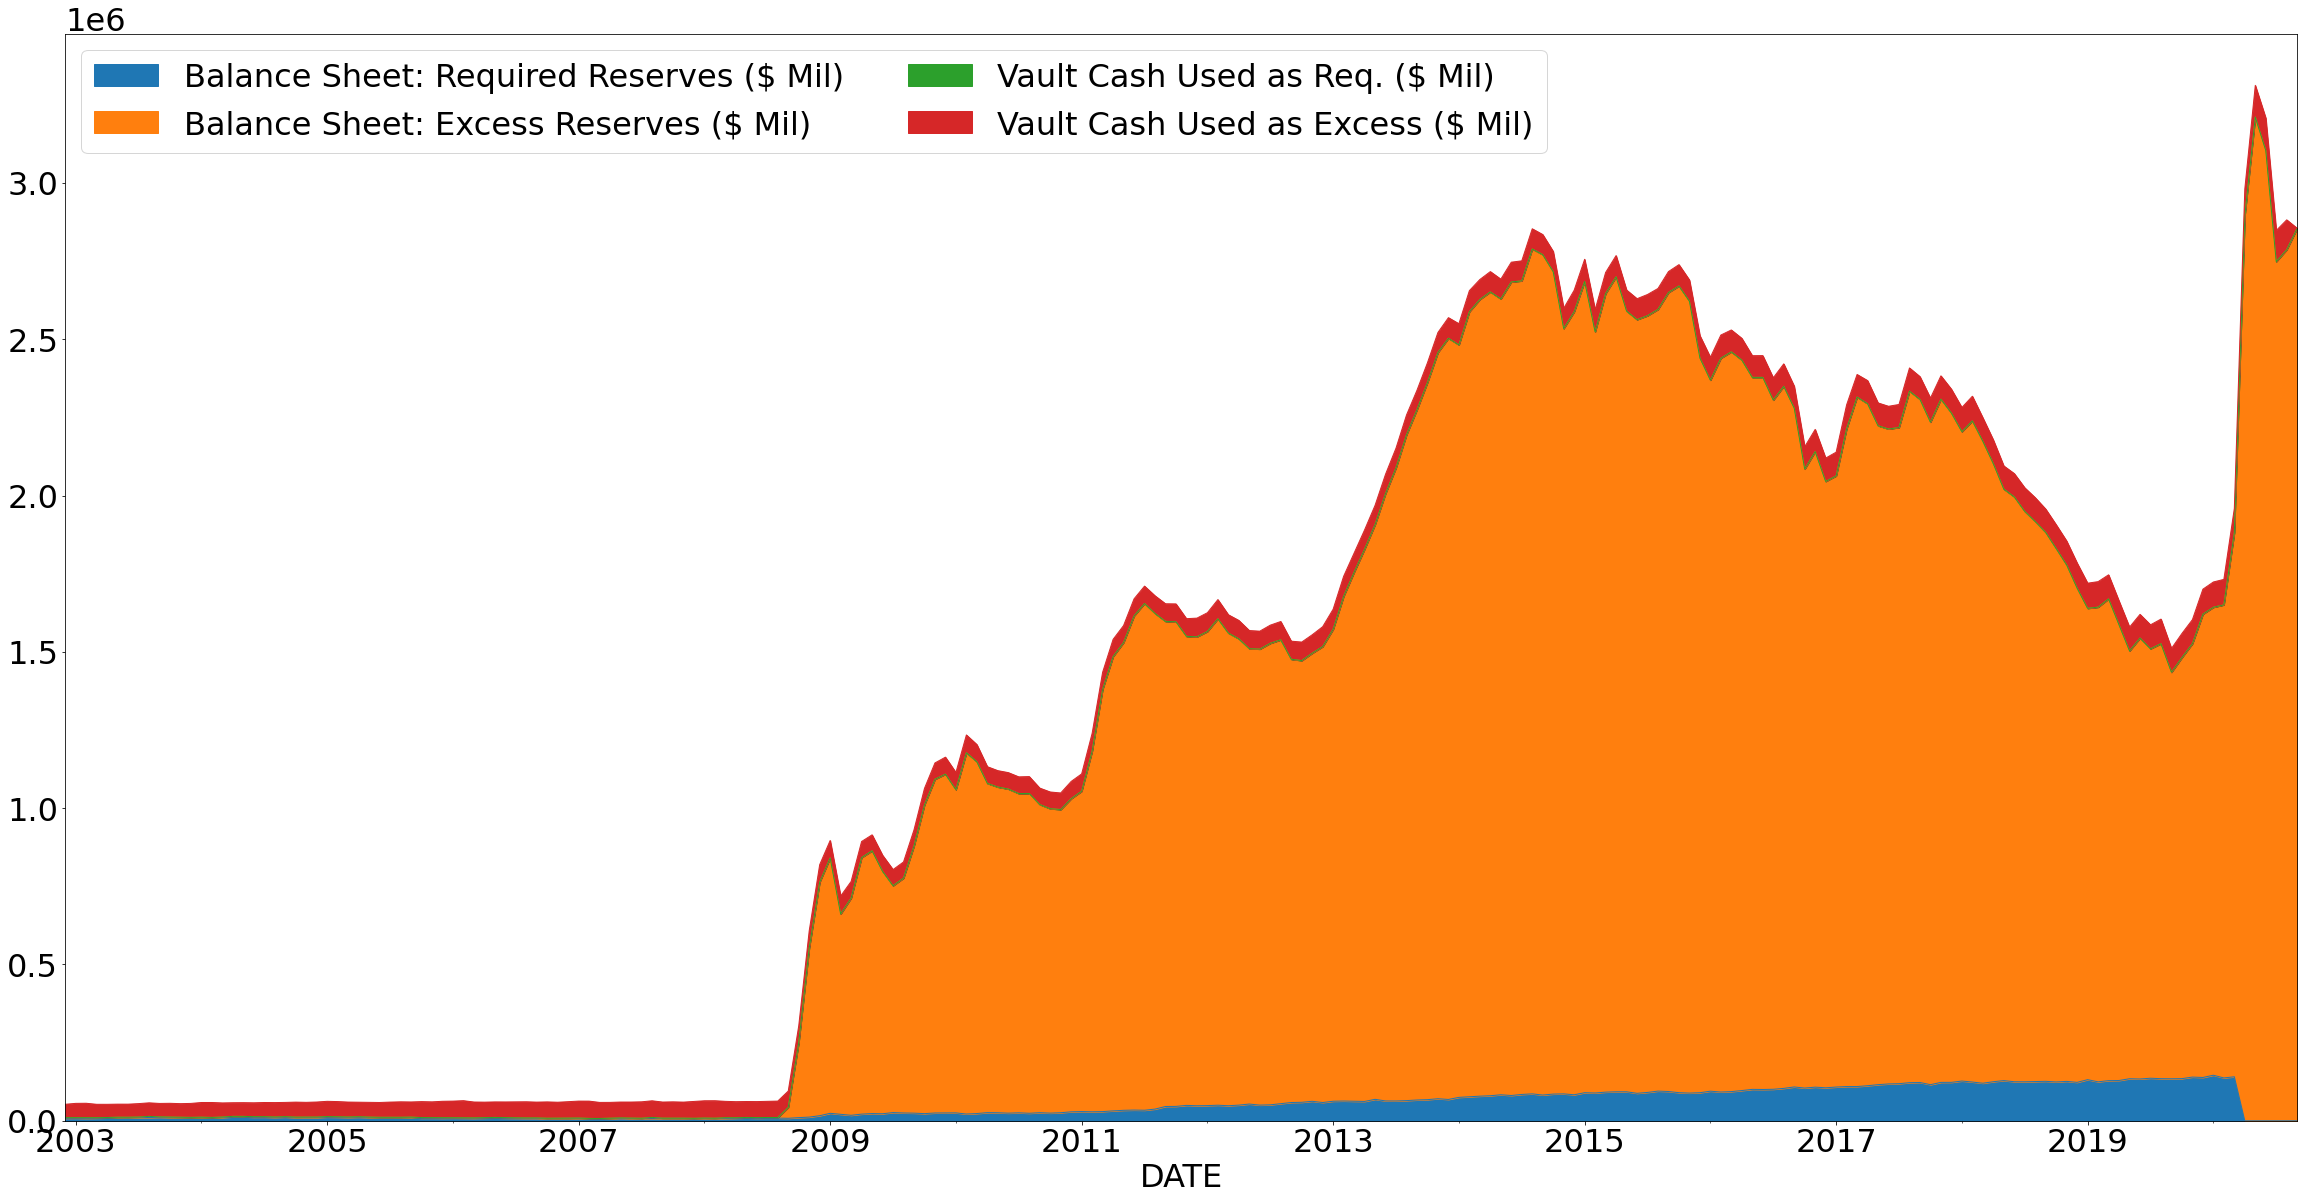

In [18]:
data["Vault Cash Used as Excess ($ Mil)"] = data["Vault Cash ($ Mil)"].sub(
    data["Vault Cash Used as Req. ($ Mil)"])

reserve_vars = ["Balance Sheet: Required Reserves ($ Mil)",
               "Balance Sheet: Excess Reserves ($ Mil)",
               "Vault Cash Used as Req. ($ Mil)",
               "Vault Cash Used as Excess ($ Mil)"]

plot_stacked_lines(data, reserve_vars)

## Assets Held by the Federal Reserve

Next, we will plot the composition of the Federal Reserve balance sheet. The balance sheet is split between assets and liabilities. First, we wiill consider the Fed's assets.

Let's plot securities held by Federal Reserves. Securities are promises to repay by the borrower to the holder of the security.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


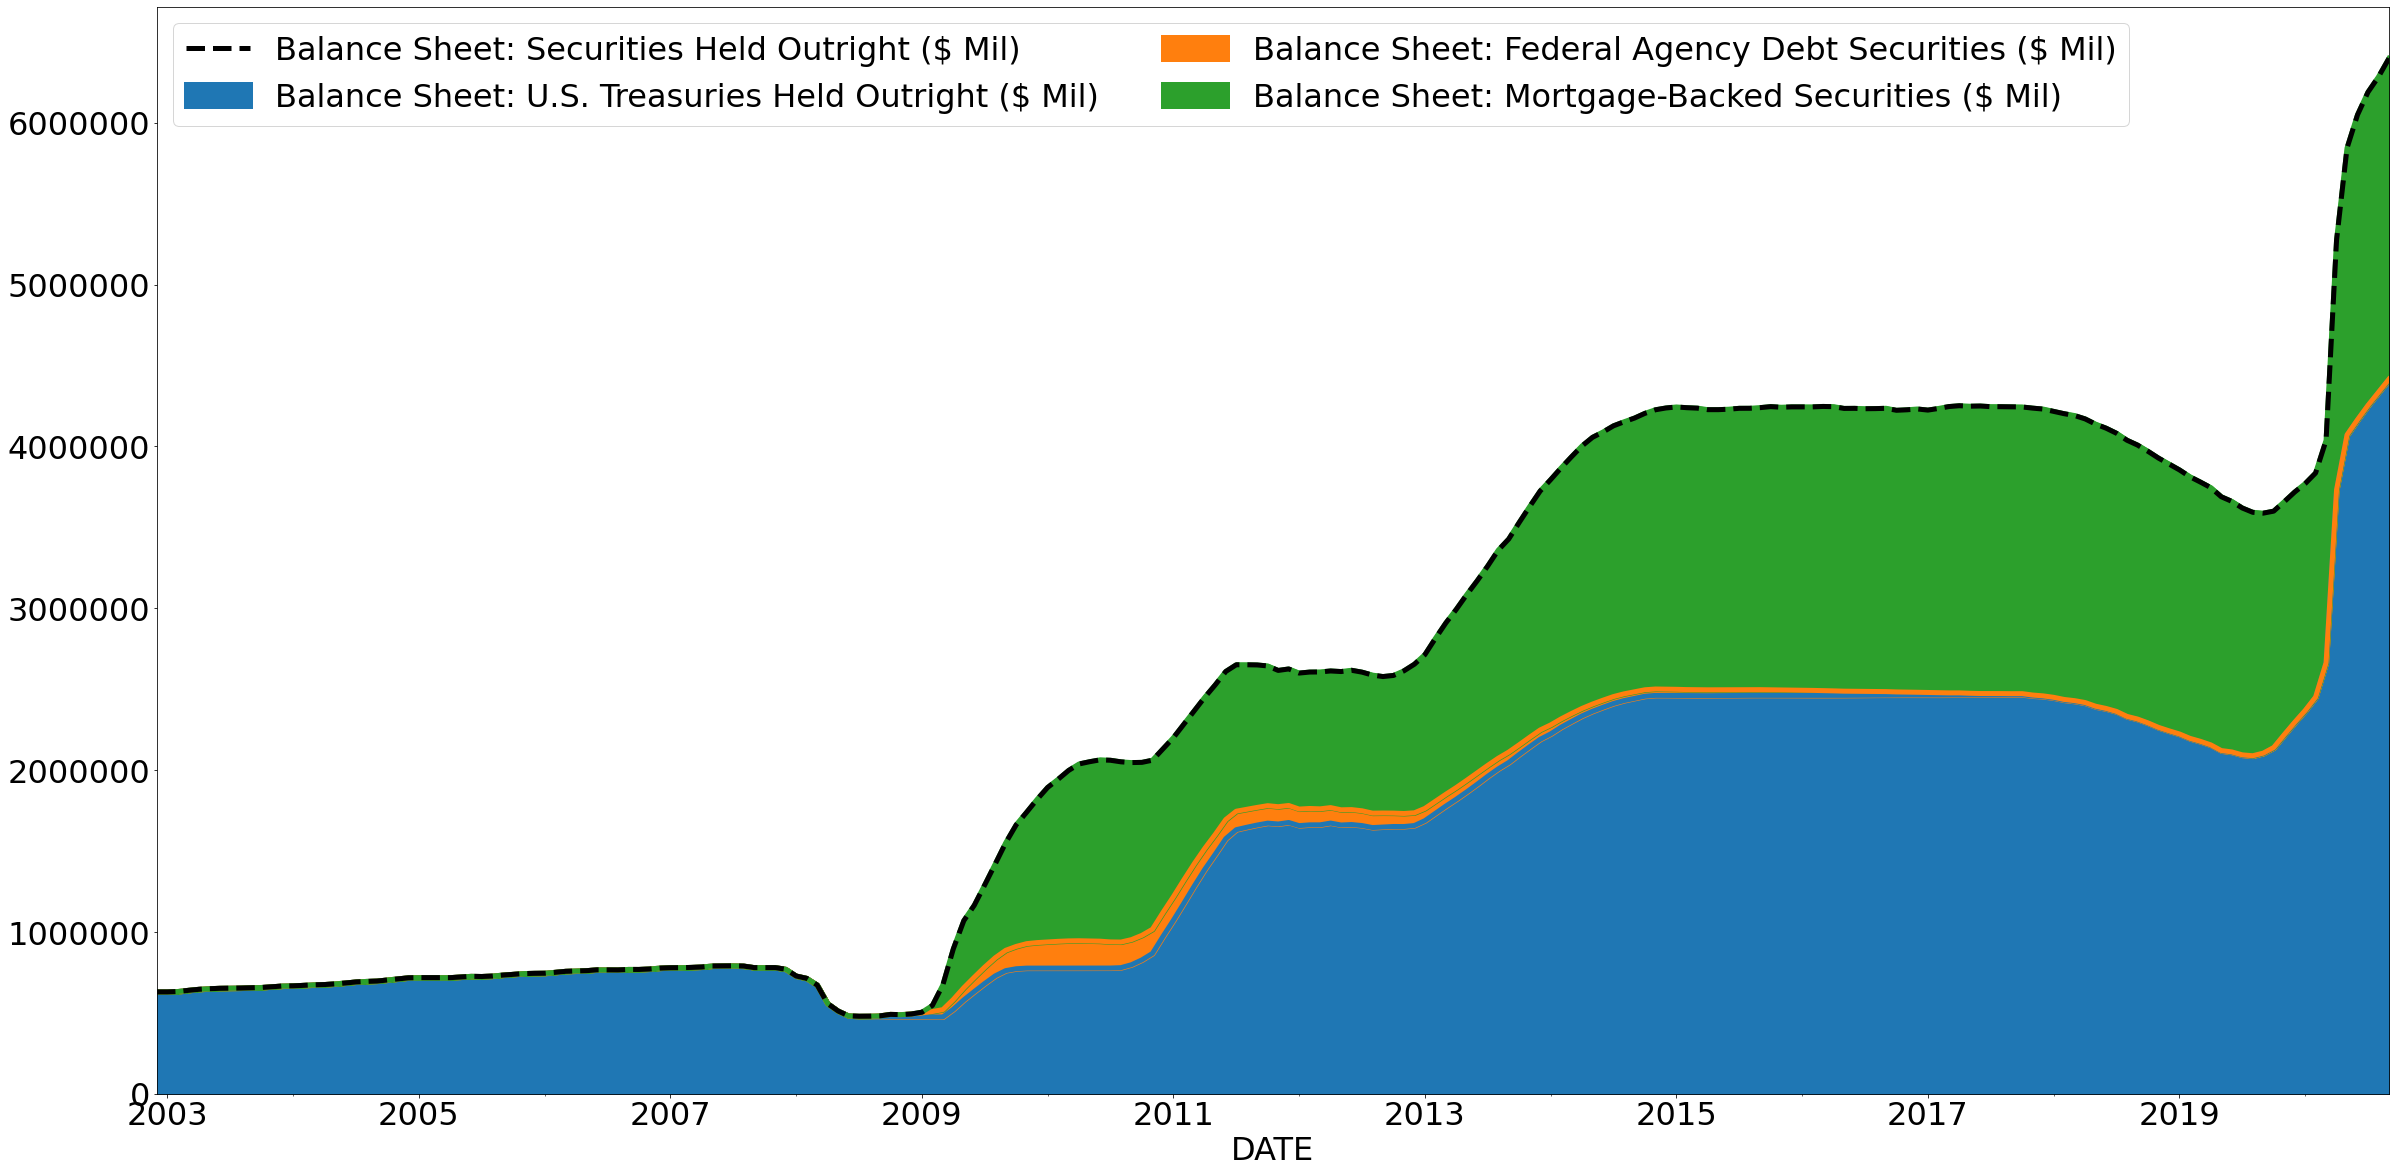

In [35]:
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
                    "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
                    "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 5, 
                  total_var = "Balance Sheet: Securities Held Outright ($ Mil)")

C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\In Class Demonstrations\datlib\plots.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["Year"] =[int(str(ind)[:4]) for ind in df.index]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[

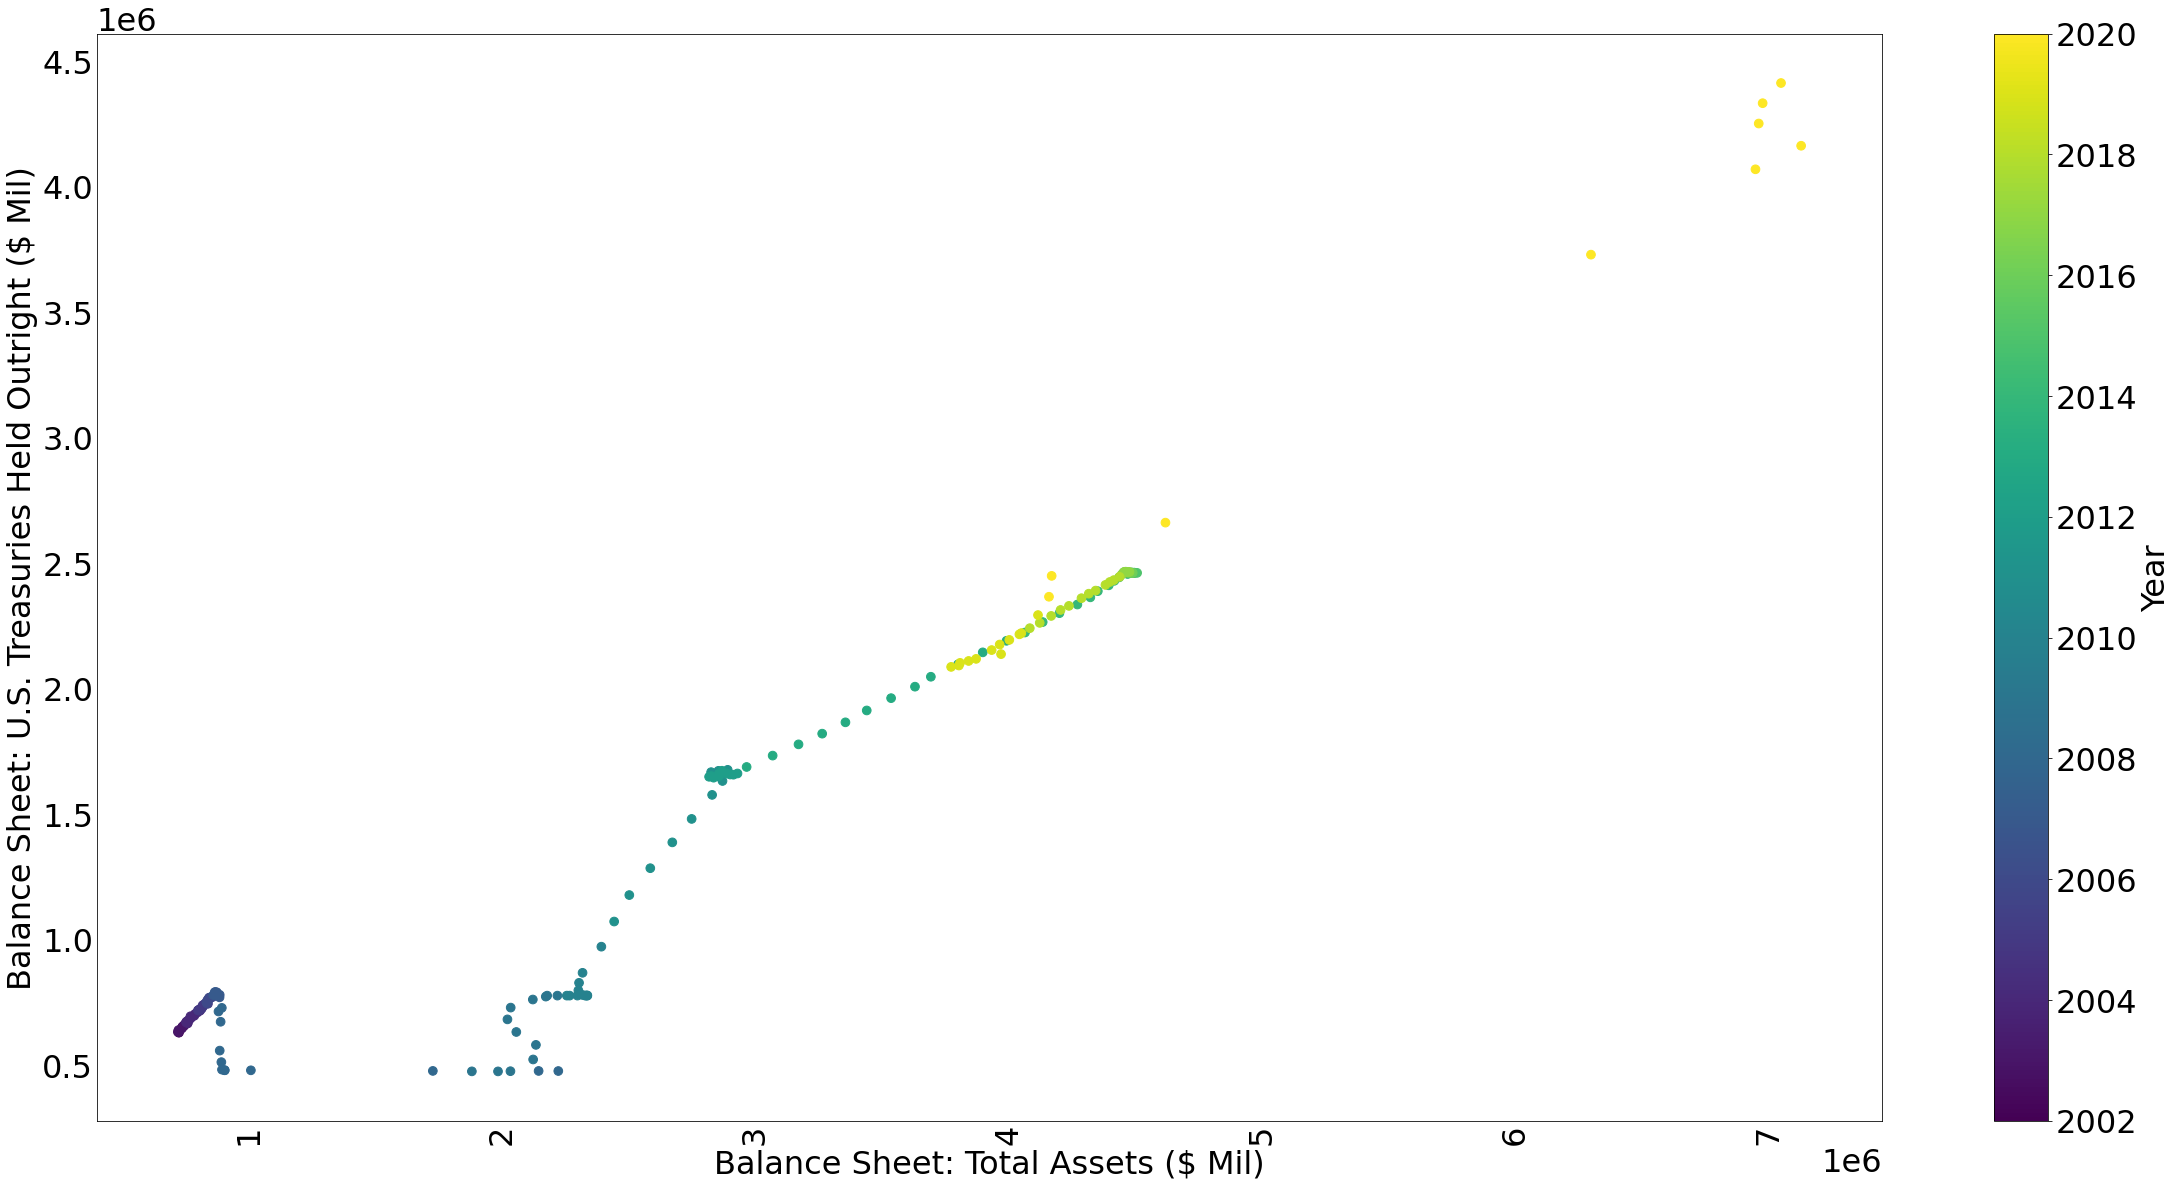

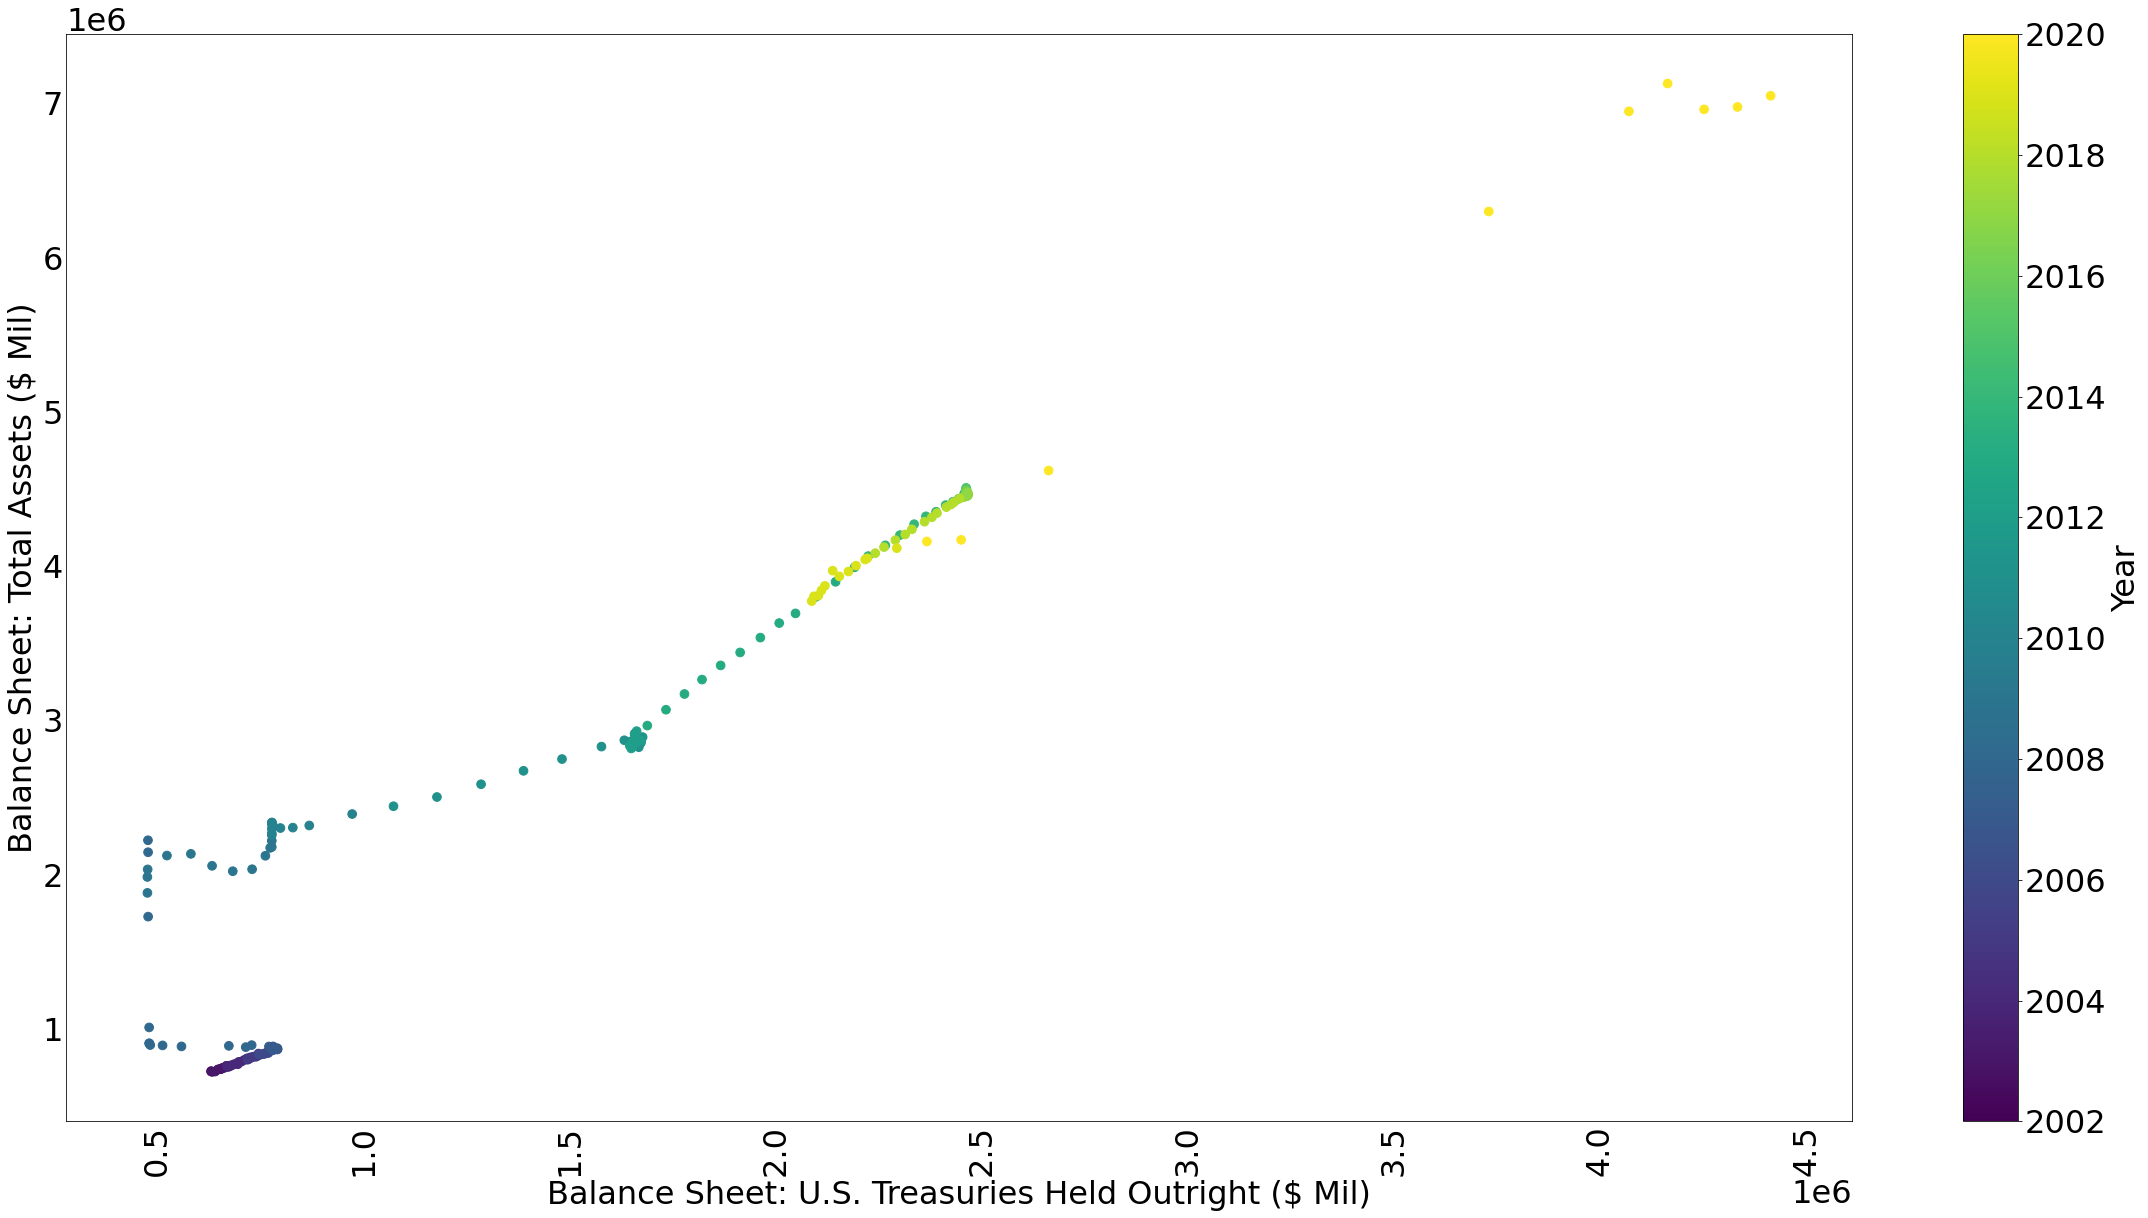

In [20]:
scatter_vars = ["Balance Sheet: Total Assets ($ Mil)",
                "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]
plot_ts_scatter(data[scatter_vars])

Next, we will plot the remainder of the Fed's assets as reflected in its balance sheet.

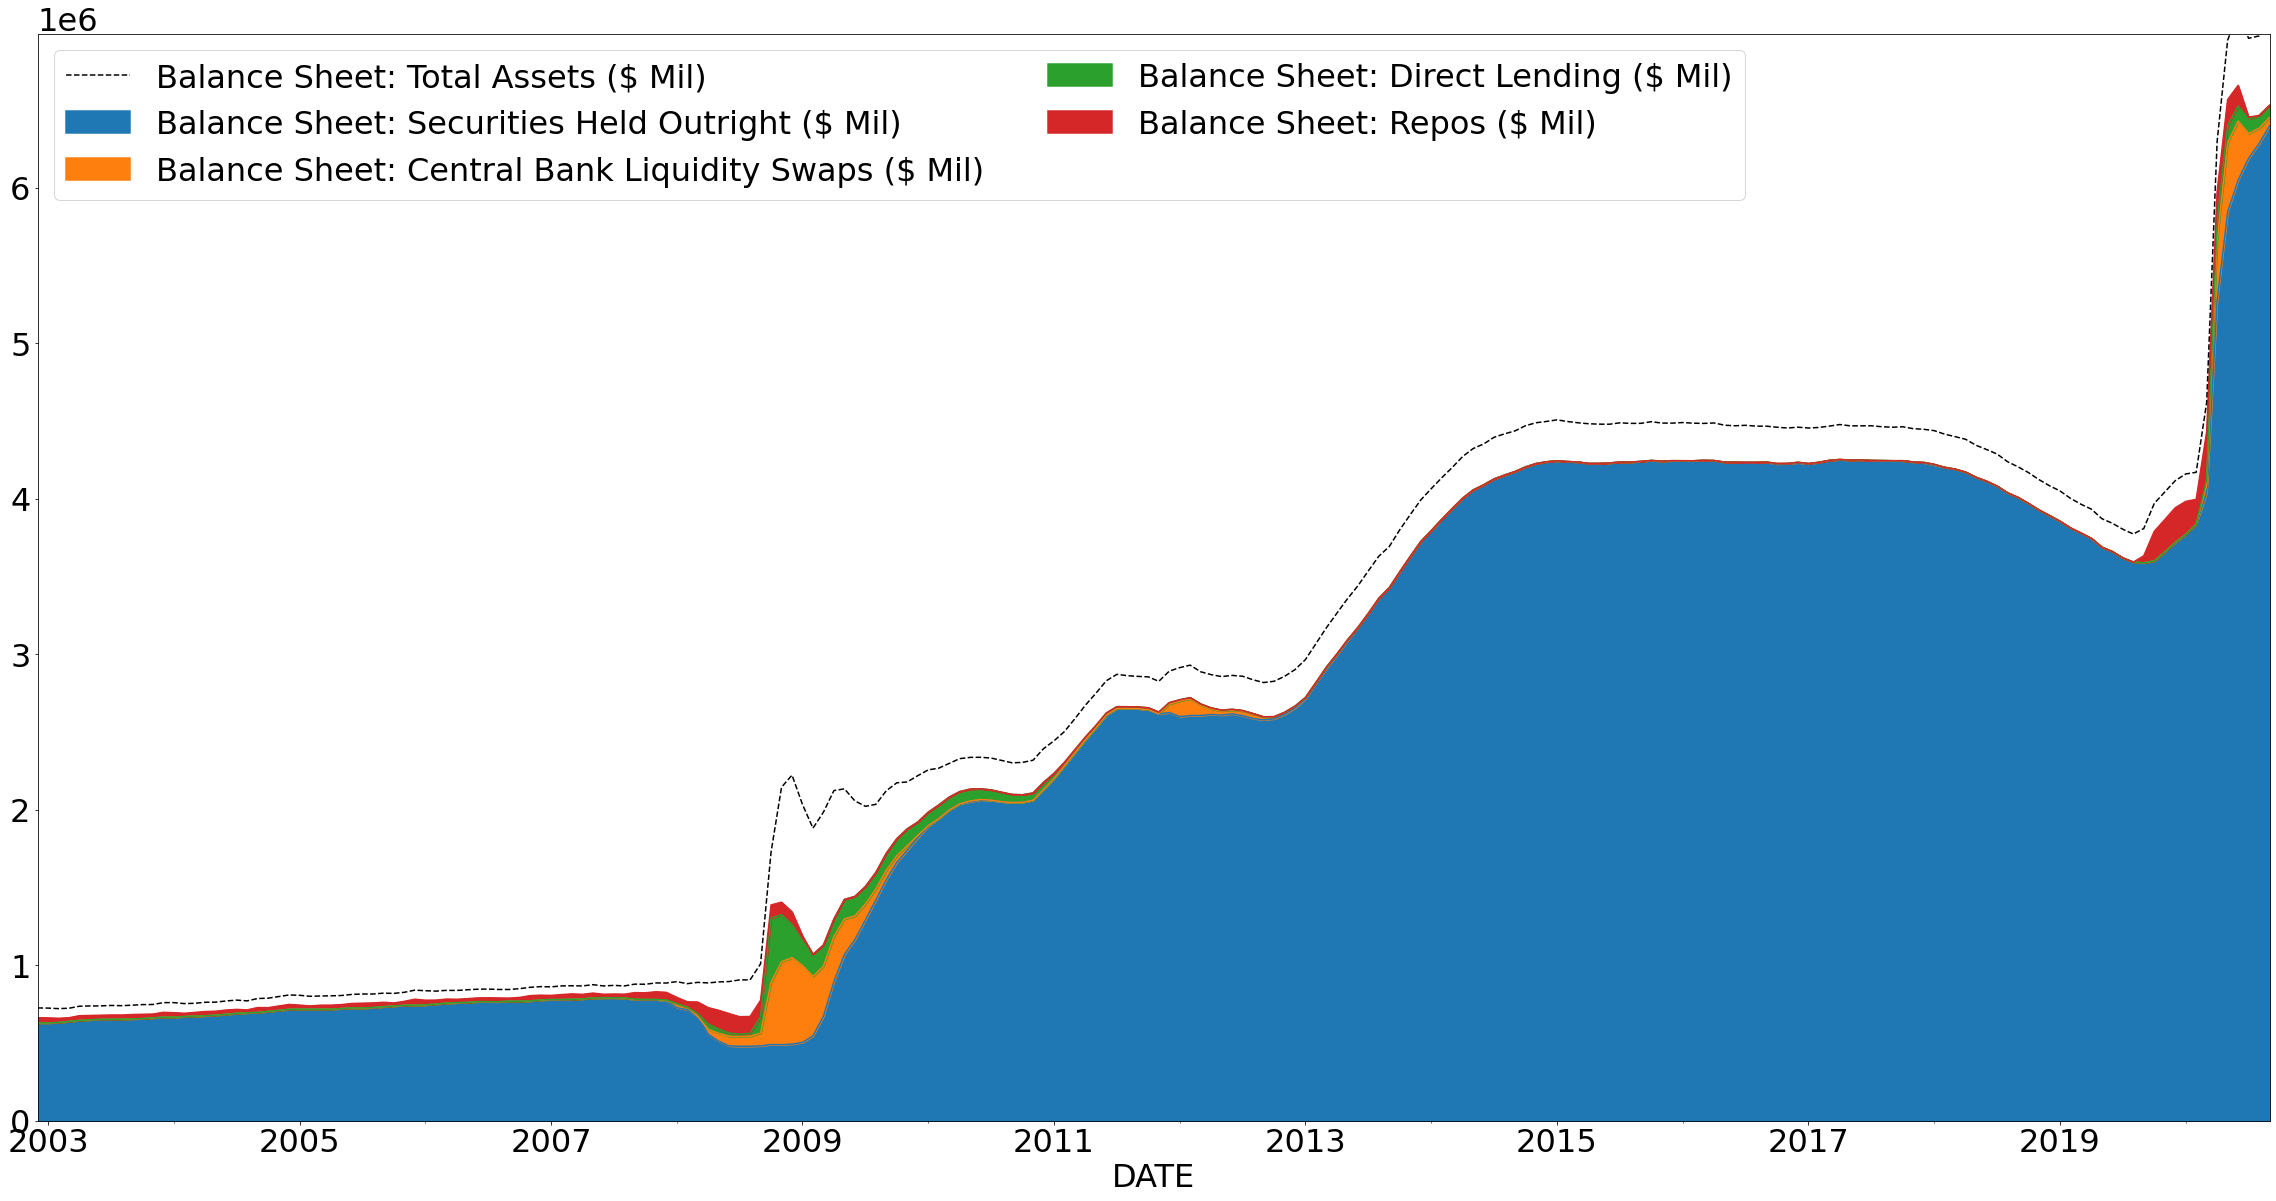

In [21]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
                "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
                "Balance Sheet: Direct Lending ($ Mil)",
                "Balance Sheet: Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)")

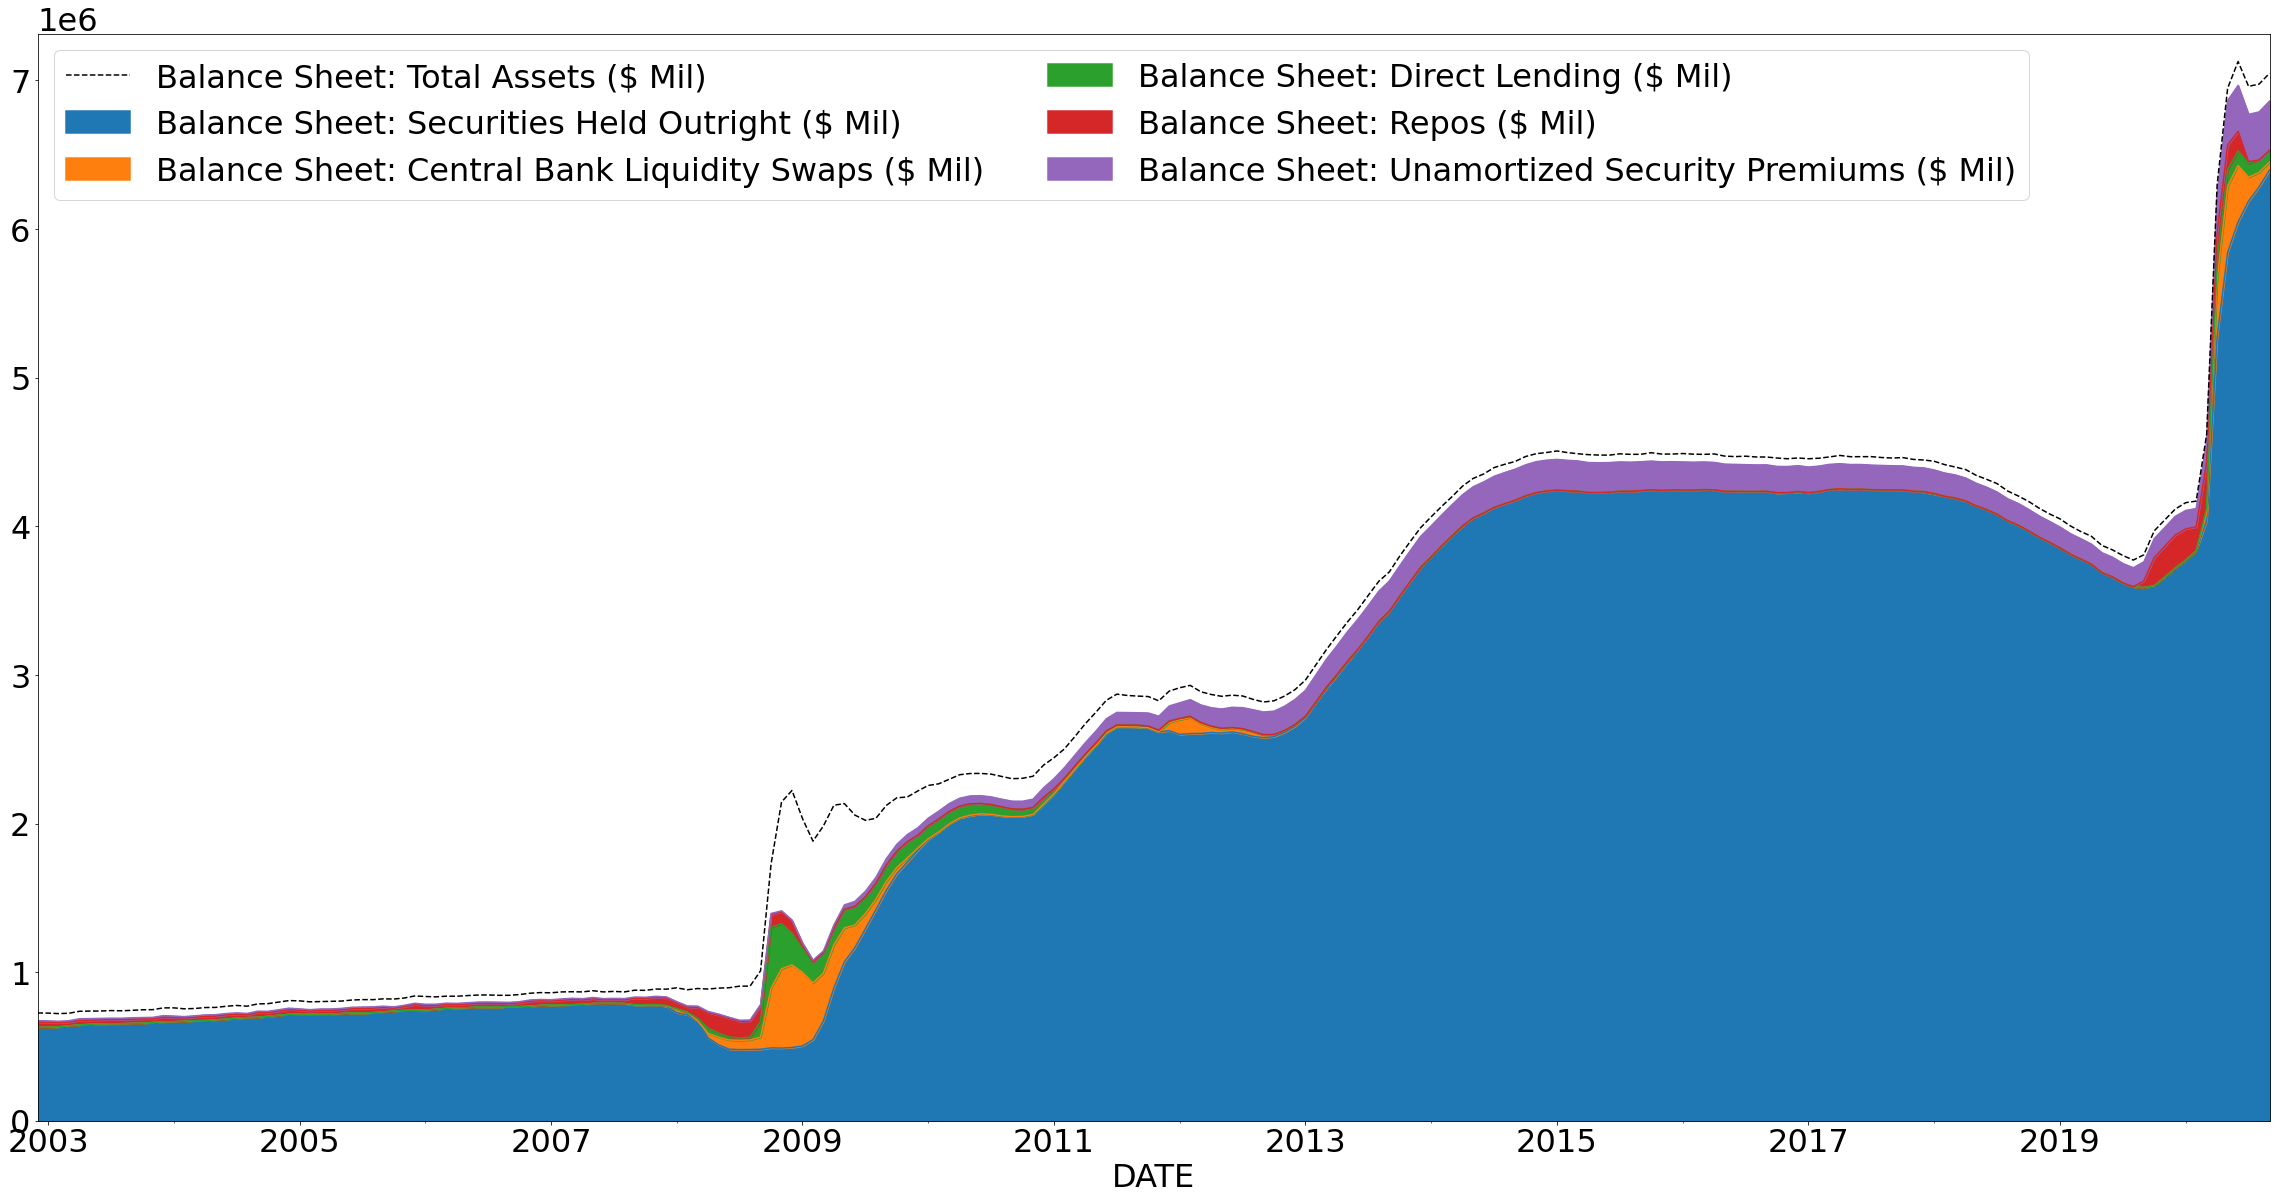

In [22]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
                "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
                "Balance Sheet: Direct Lending ($ Mil)",
                "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)")

## Liabilities of the Federal Reserve

Next we will plot the liabilities side of the Fed's balance sheet. This includes all federal reserve notes and deposit accounts at the Fed.

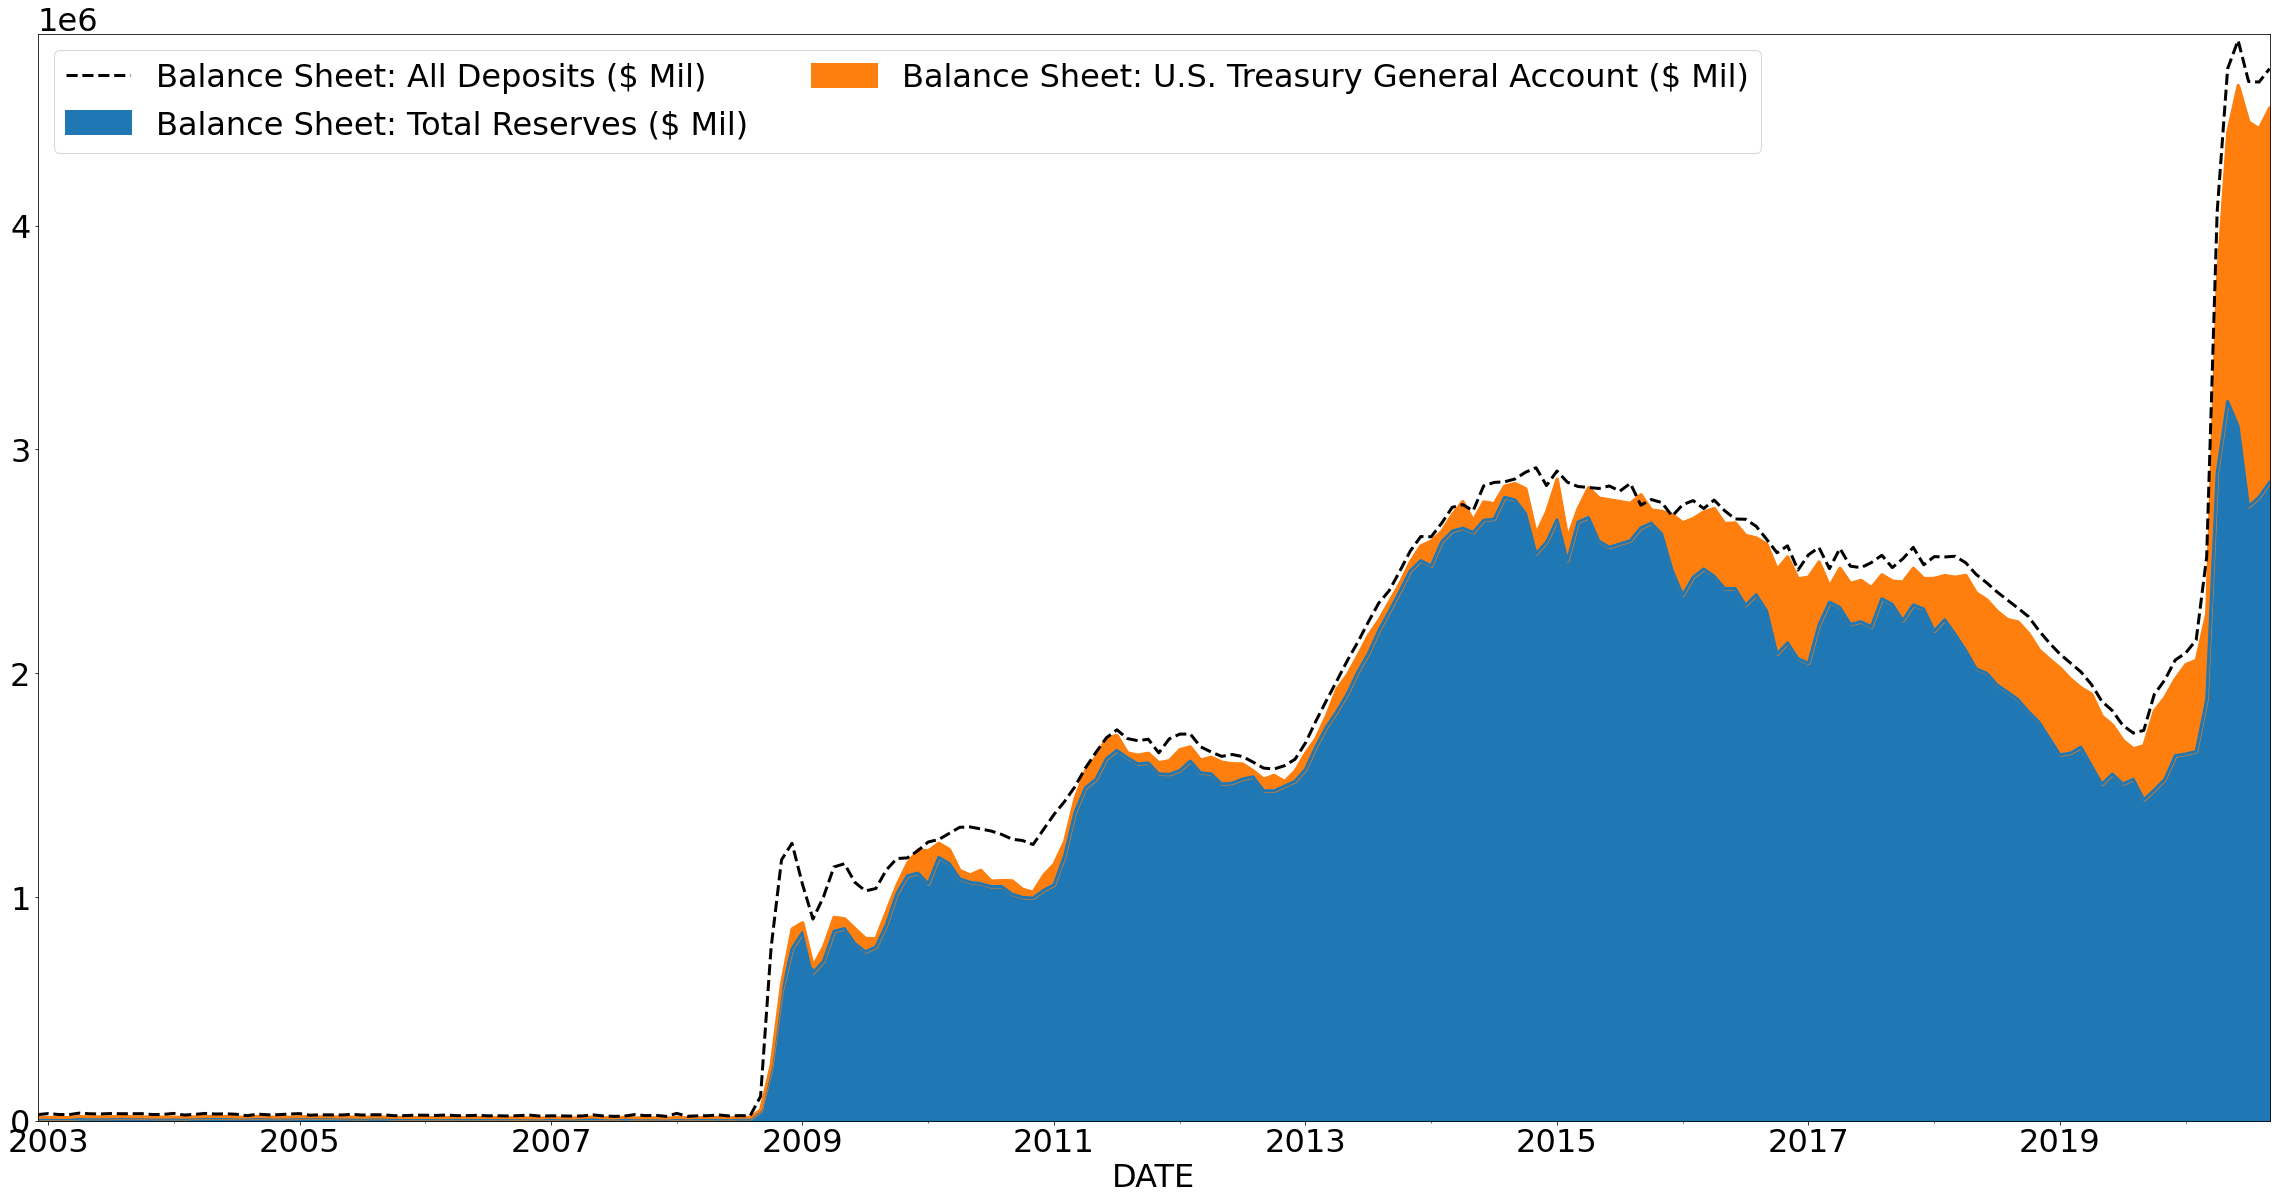

In [23]:
account_vars = ["Balance Sheet: Total Reserves ($ Mil)",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, 
                   total_var = "Balance Sheet: All Deposits ($ Mil)")

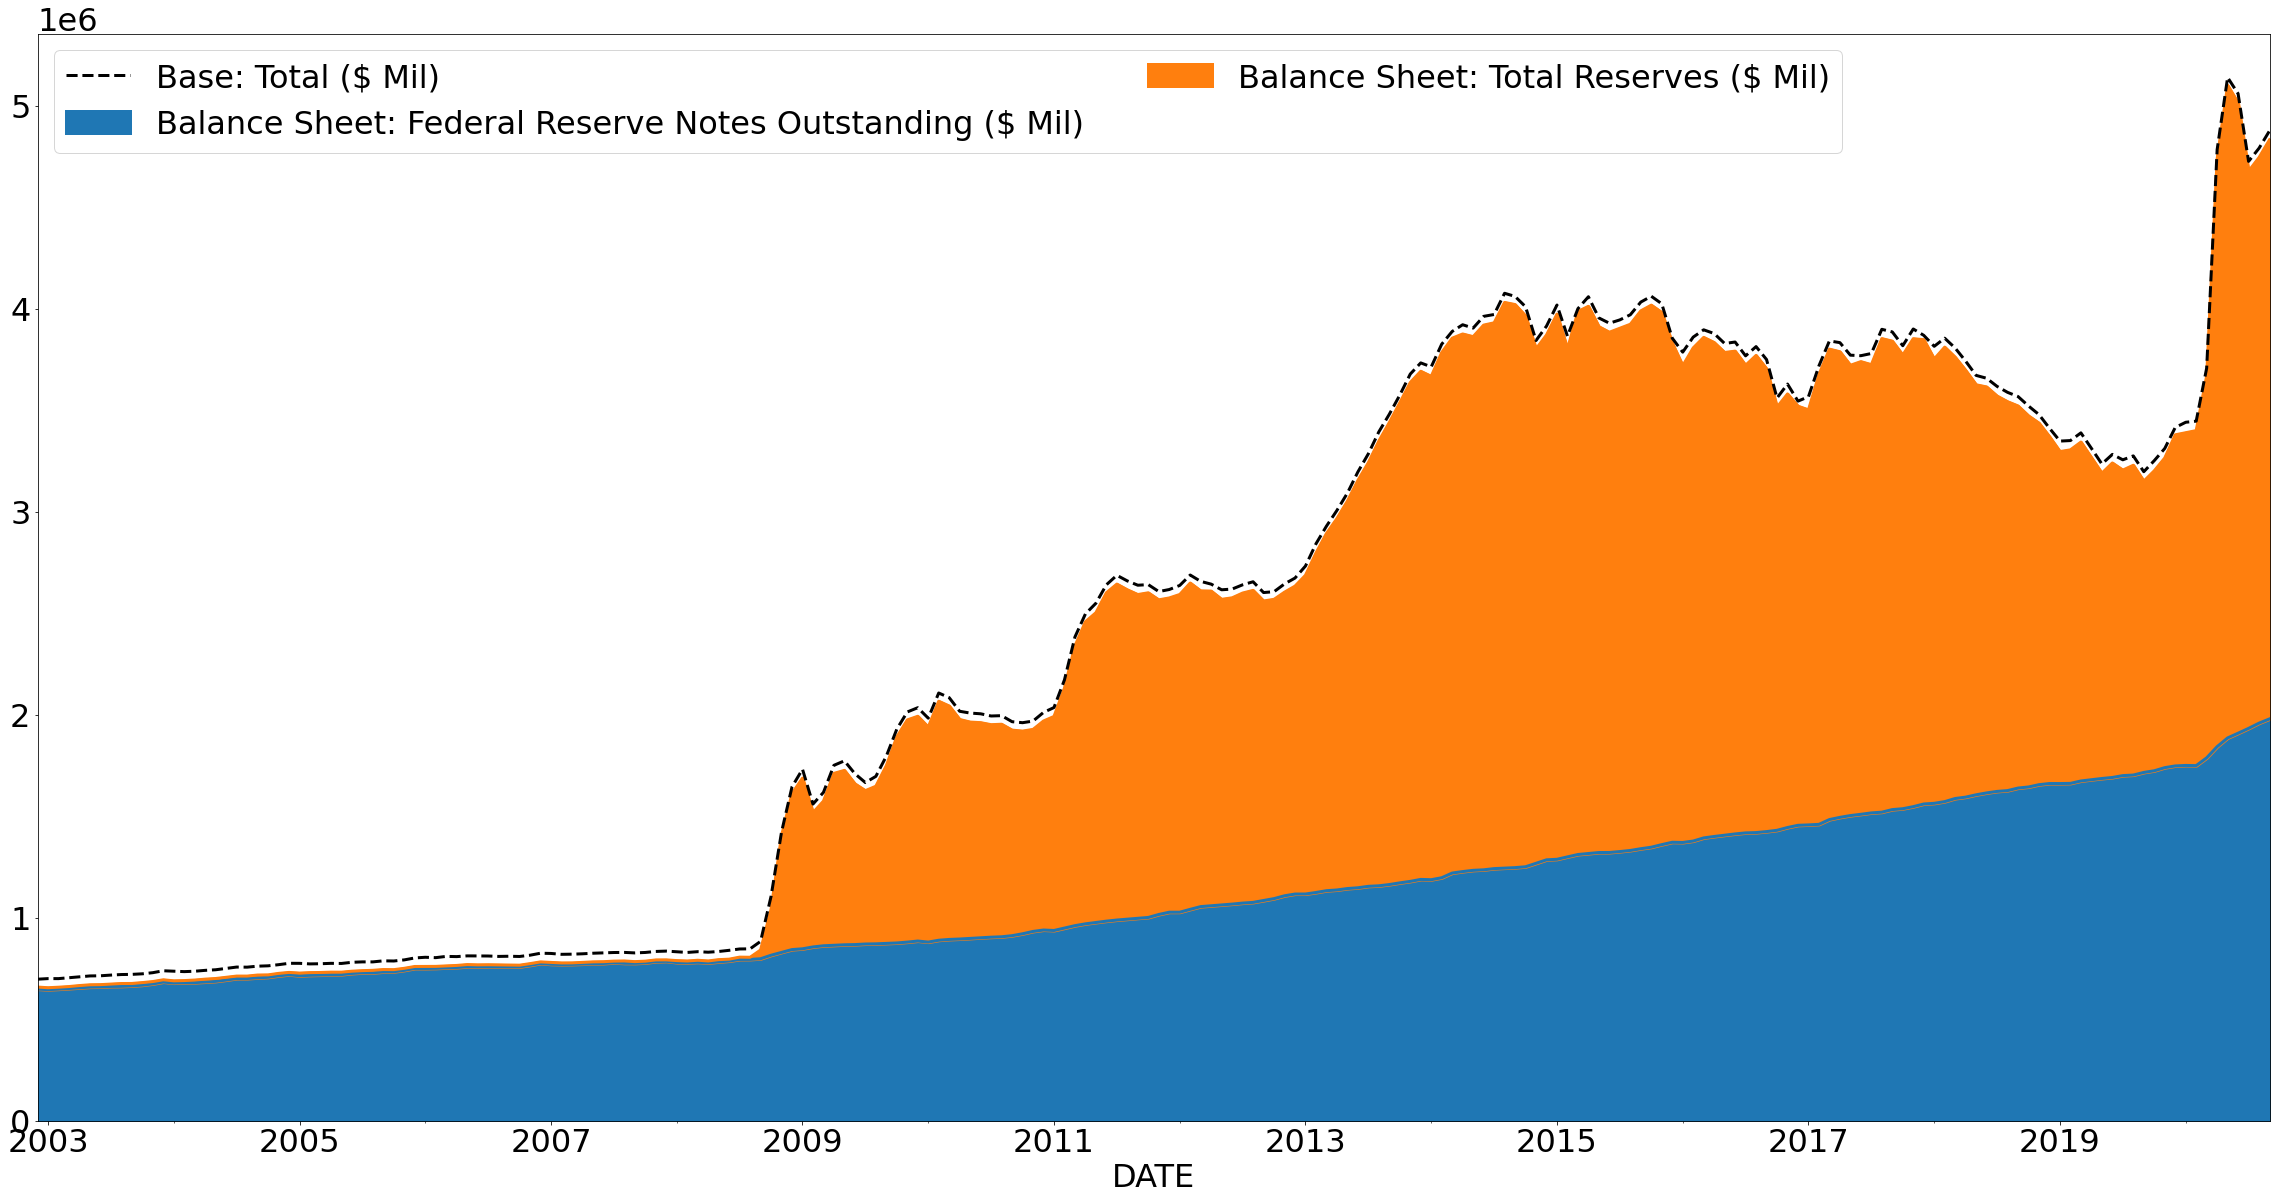

In [24]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]
plot_stacked_lines(data, account_vars, linewidth = 3, 
                   total_var = "Base: Total ($ Mil)")

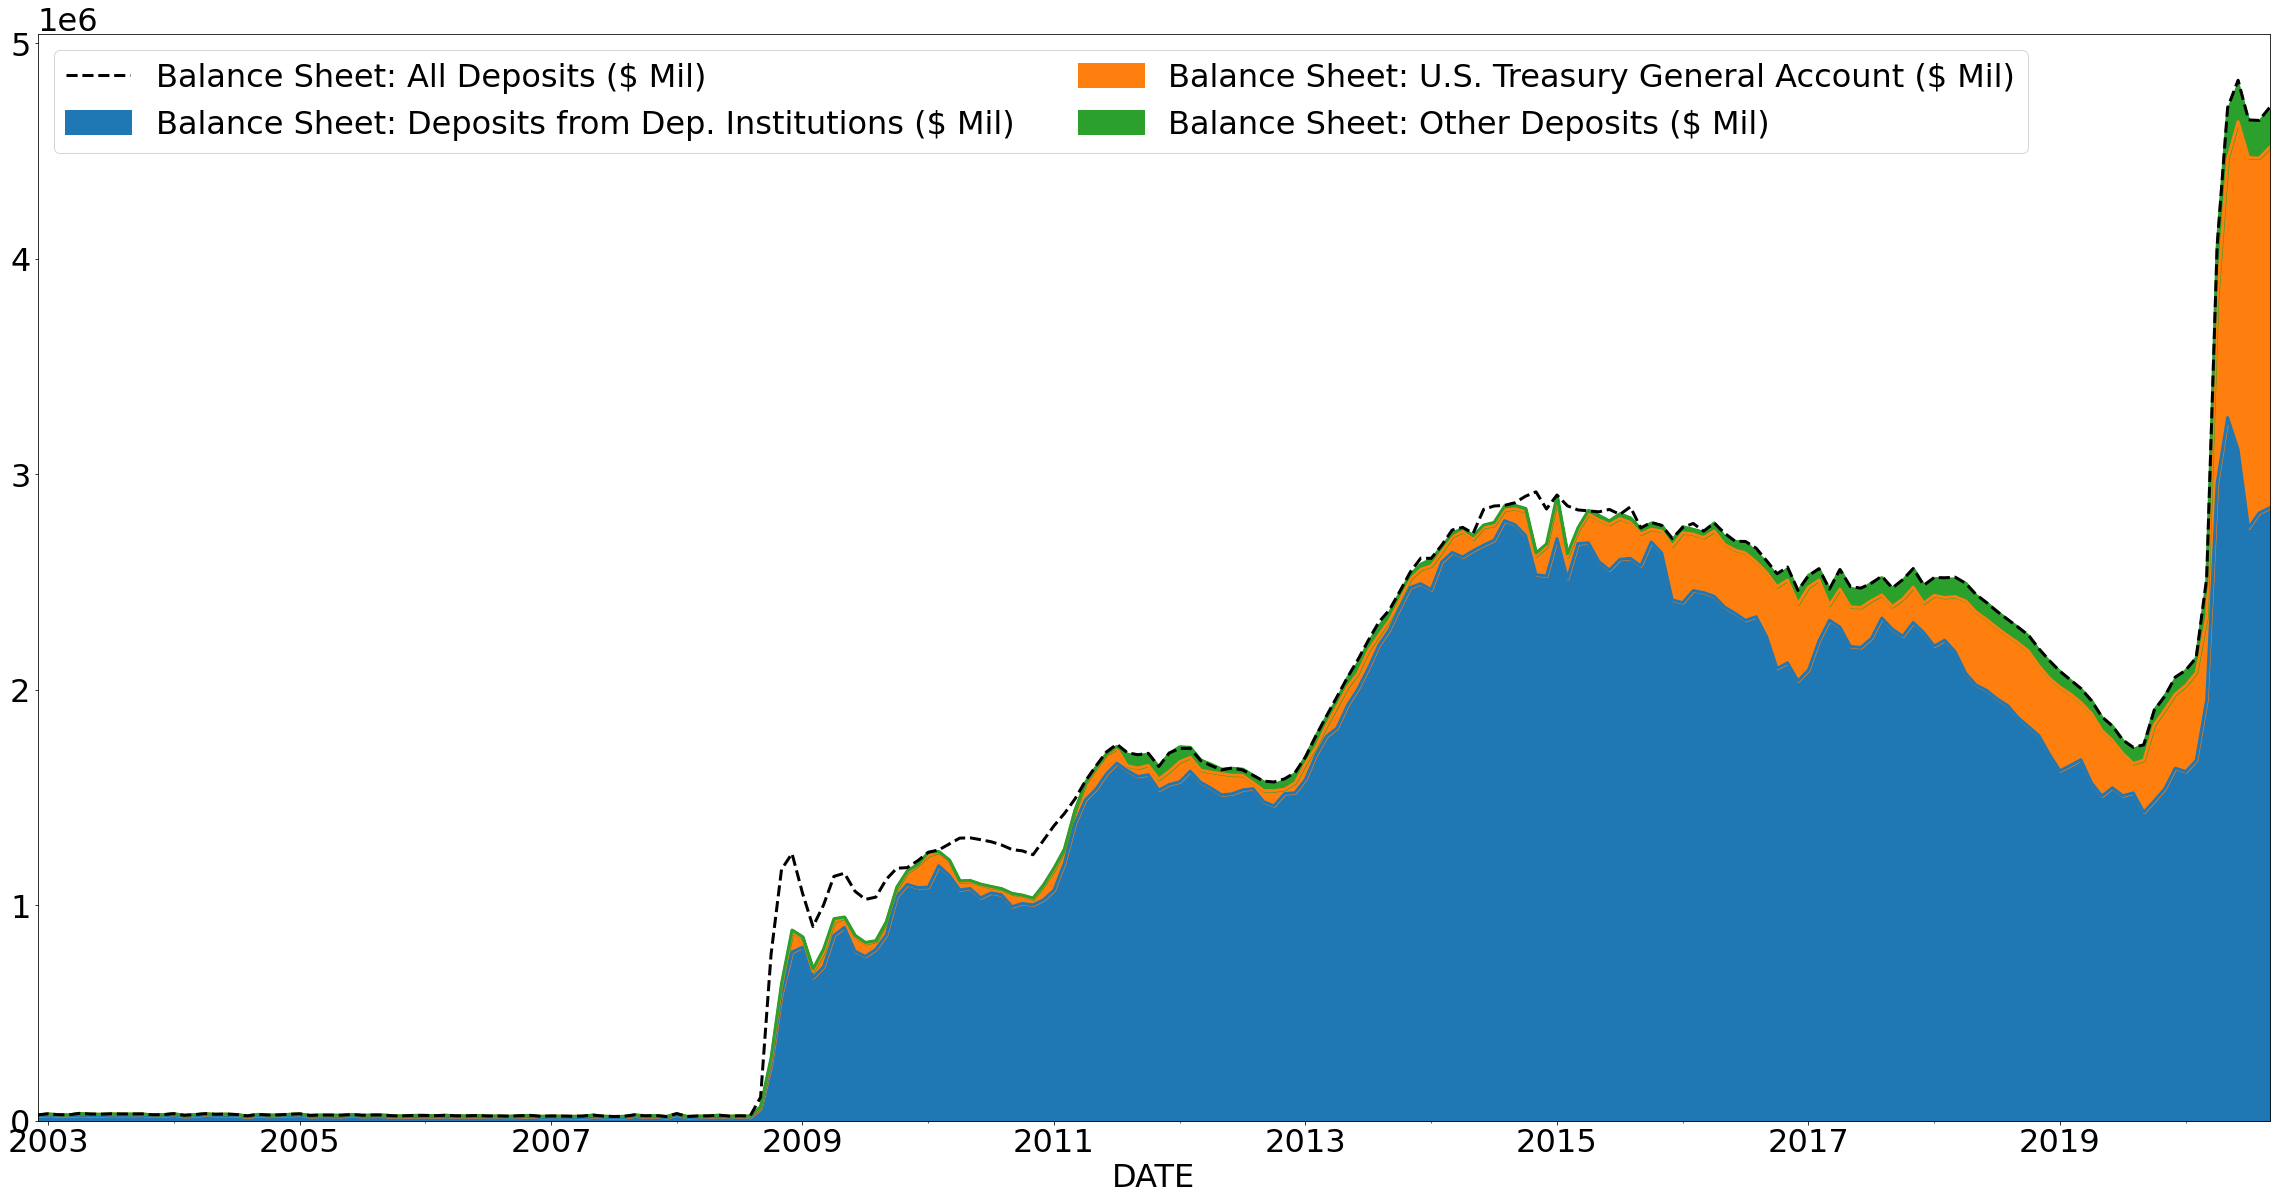

In [25]:
account_vars = ["Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)",
               "Balance Sheet: Other Deposits ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, 
                   total_var = "Balance Sheet: All Deposits ($ Mil)")

Finally, let's divide liabilities between Federal Reserve Notes Outstanding, Deposits, and Reverse Repos. The last category, reverse repos, represents the Fed borrowing from the overnight lending market. This is the equivalent of removing funds from that market.

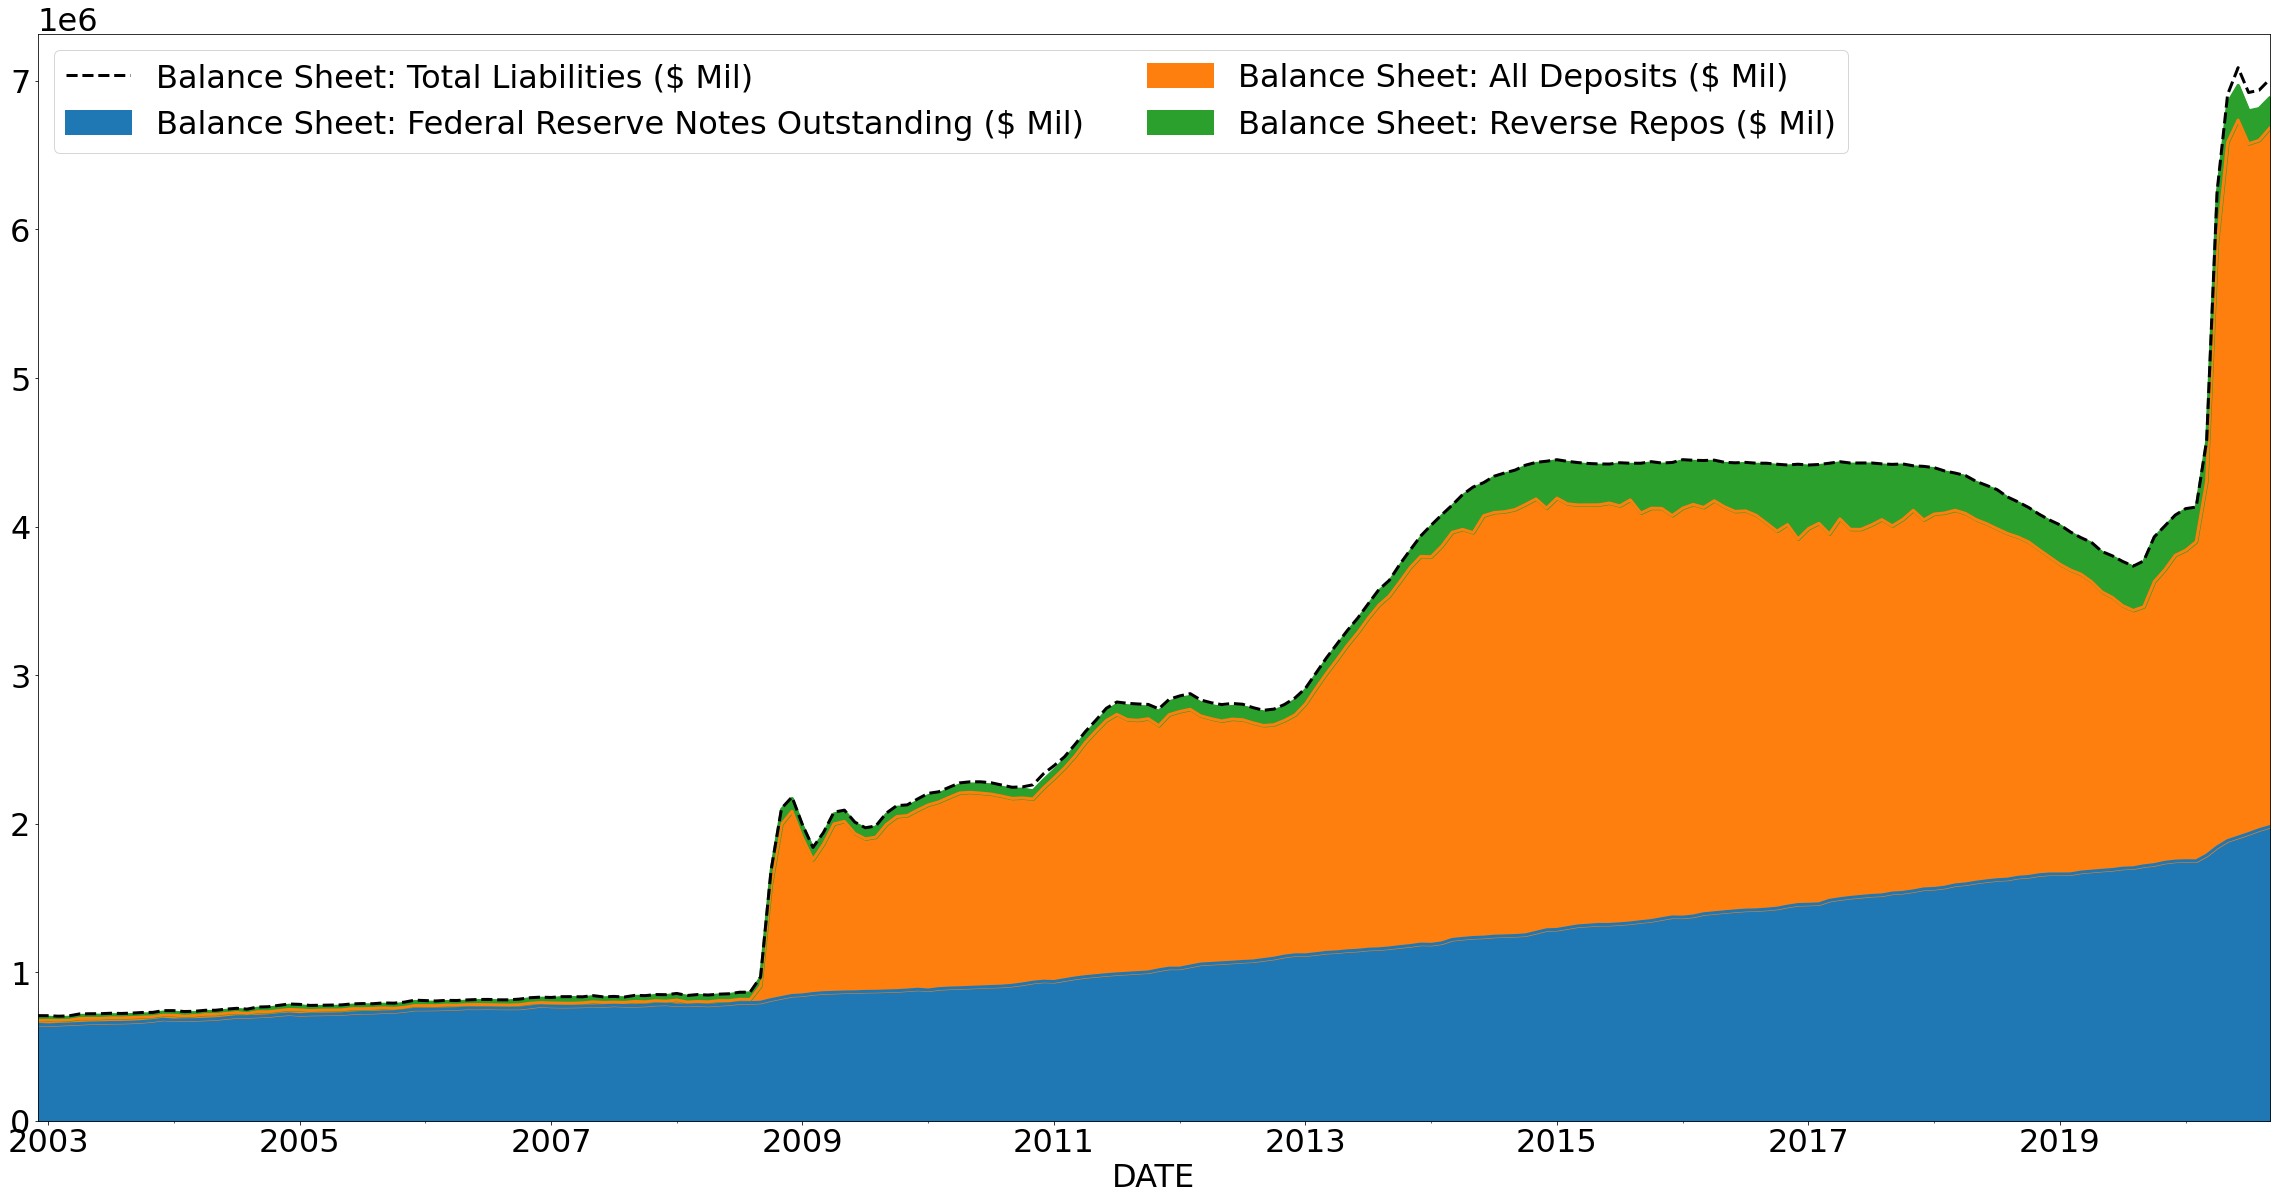

In [26]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
               "Balance Sheet: All Deposits ($ Mil)",
               "Balance Sheet: Reverse Repos ($ Mil)"]
plot_stacked_lines(data, account_vars, linewidth = 3,
                   total_var = "Balance Sheet: Total Liabilities ($ Mil)")

## Overnight Lending and the Federal Funds Rate

Next, let's show the effects of Federal Reserve operations in the overnight lending market by netting out reverse repos from the value of repos.

C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\In Class Demonstrations\datlib\plots.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(vals)


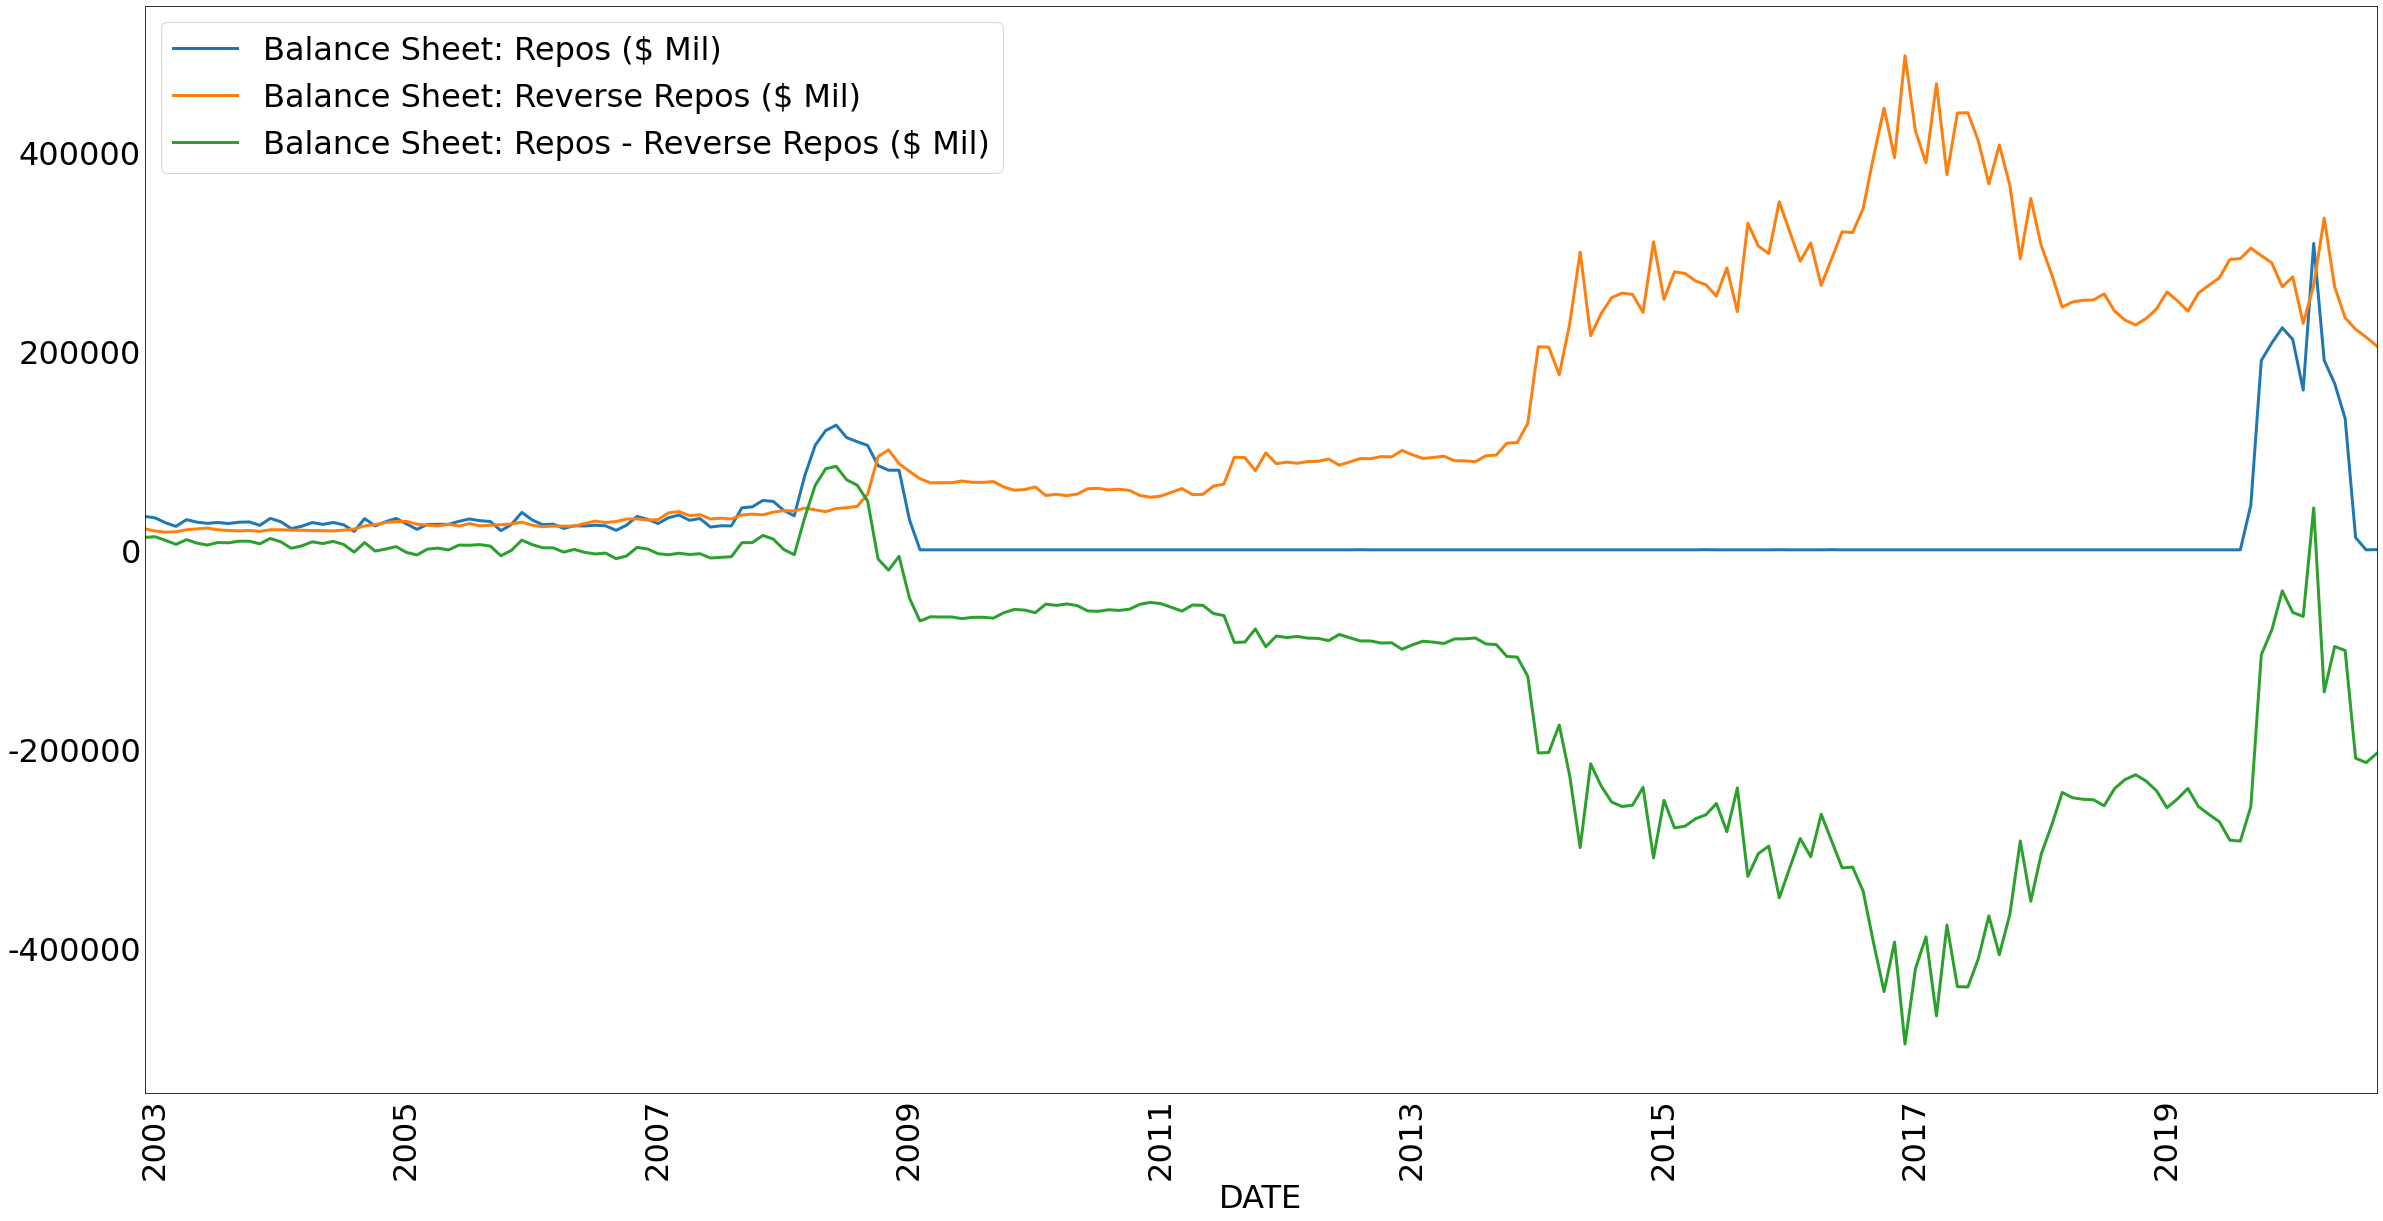

In [27]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])

overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                 "Balance Sheet: Reverse Repos ($ Mil)",
                 "Balance Sheet: Repos - Reverse Repos ($ Mil)"]
plot_lines(data[overnight_vars], linewidth = 3)

The Fed intervenesin the overnight lending market with the intention of influencing the total expednitures, which includes investment. This policy is guided by the Fed's interest rate target. After 2008, the accomplishment of the federal funds target is supported by the setting of the rate paid on excess reserves held at the Fed.

C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\In Class Demonstrations\datlib\plots.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(vals)


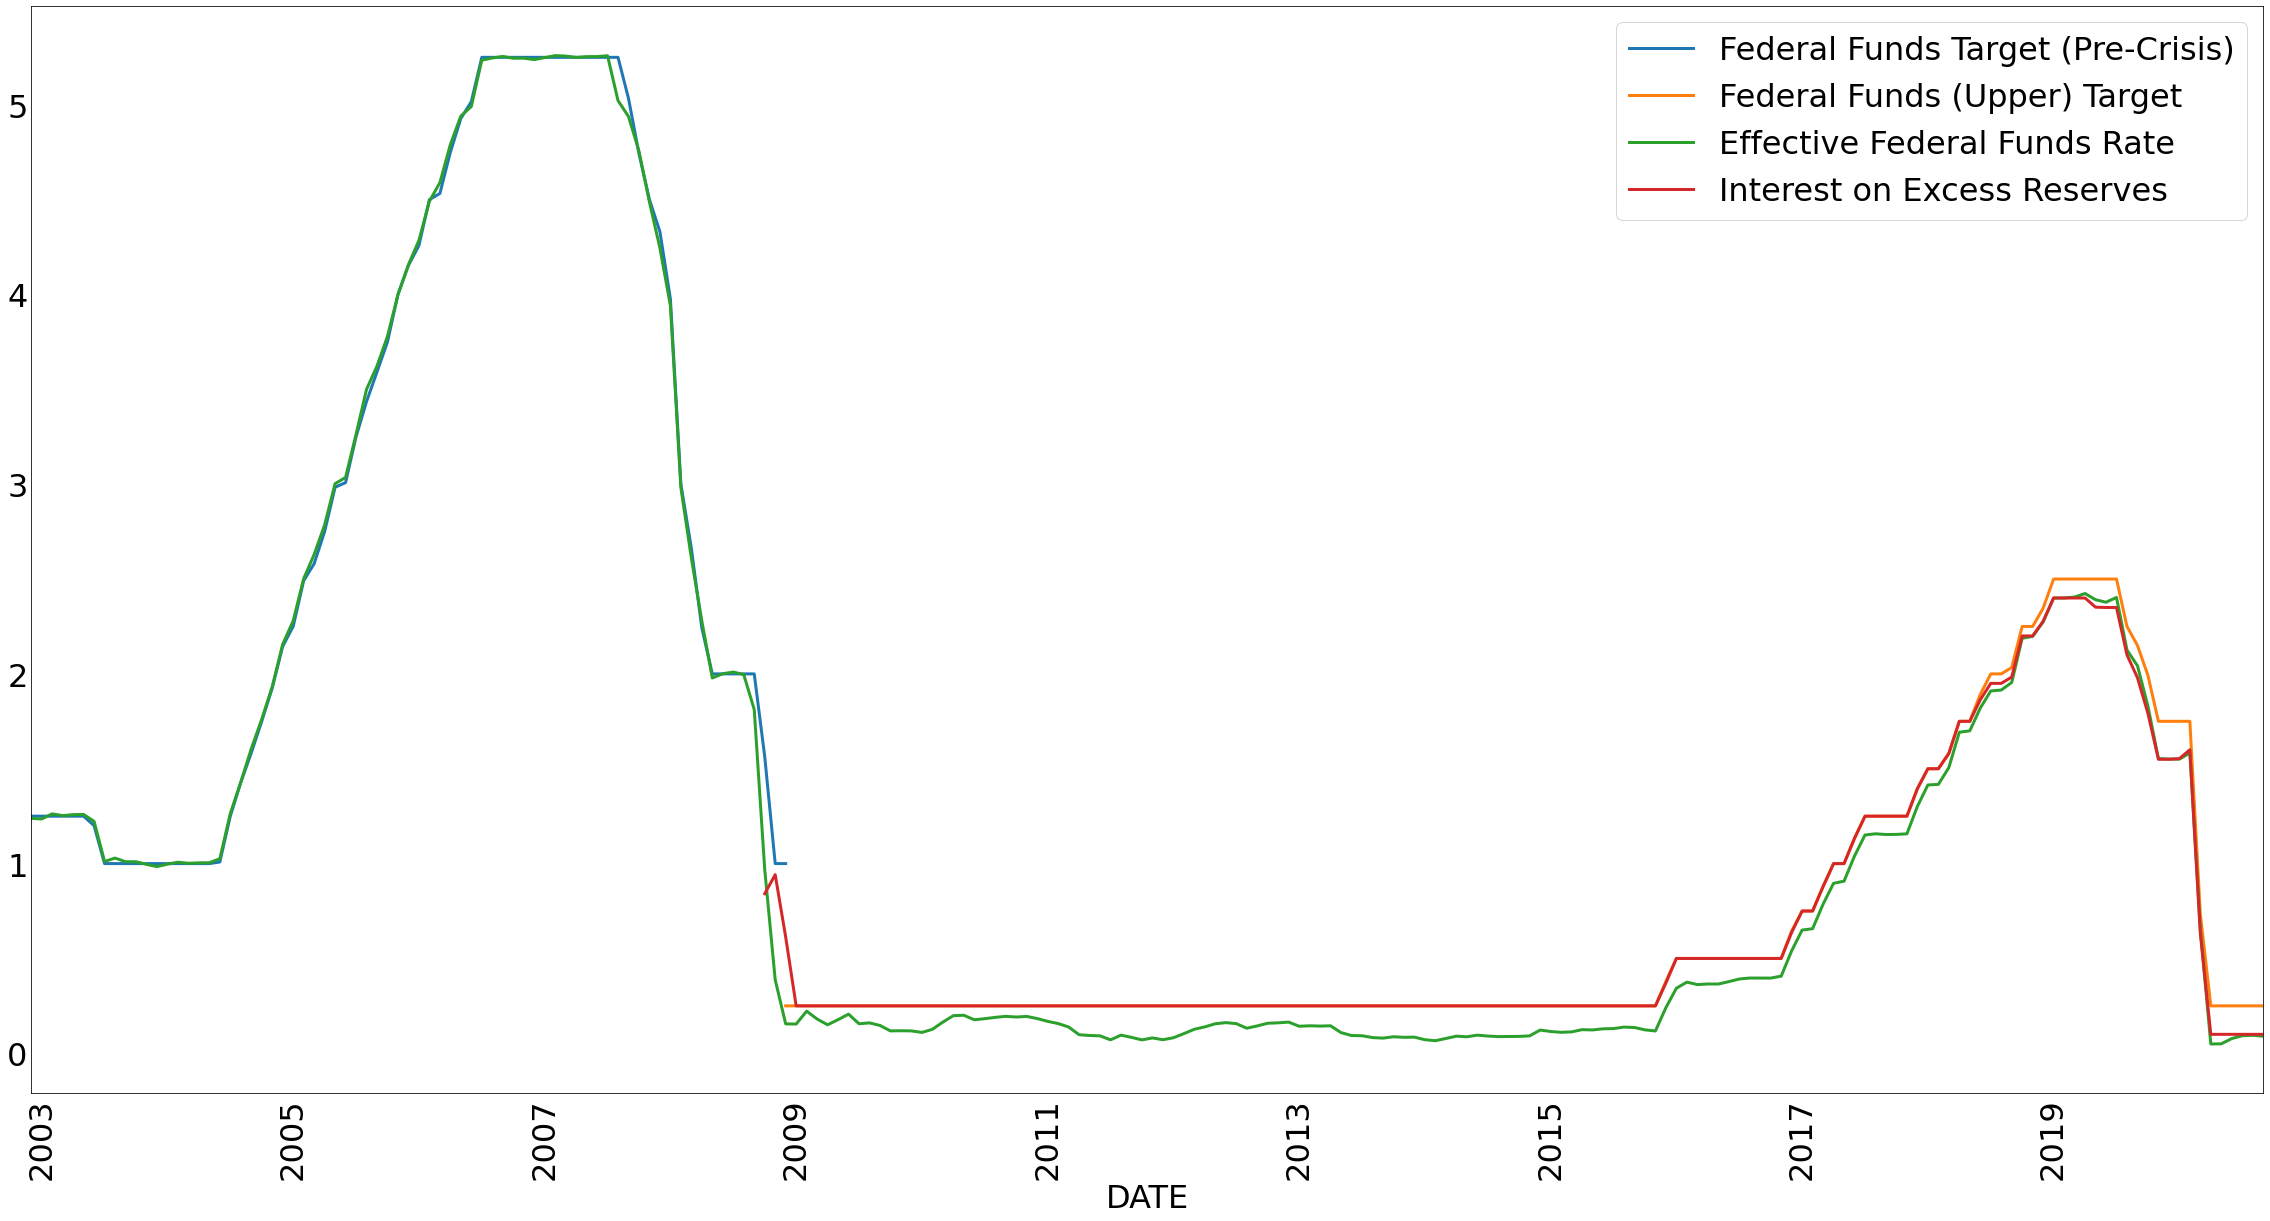

In [28]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                "Federal Funds (Upper) Target",
                "Effective Federal Funds Rate",
                "Interest on Excess Reserves"]
plot_lines(data[interest_vars], linewidth = 3)

TypeError: object of type 'generator' has no len()

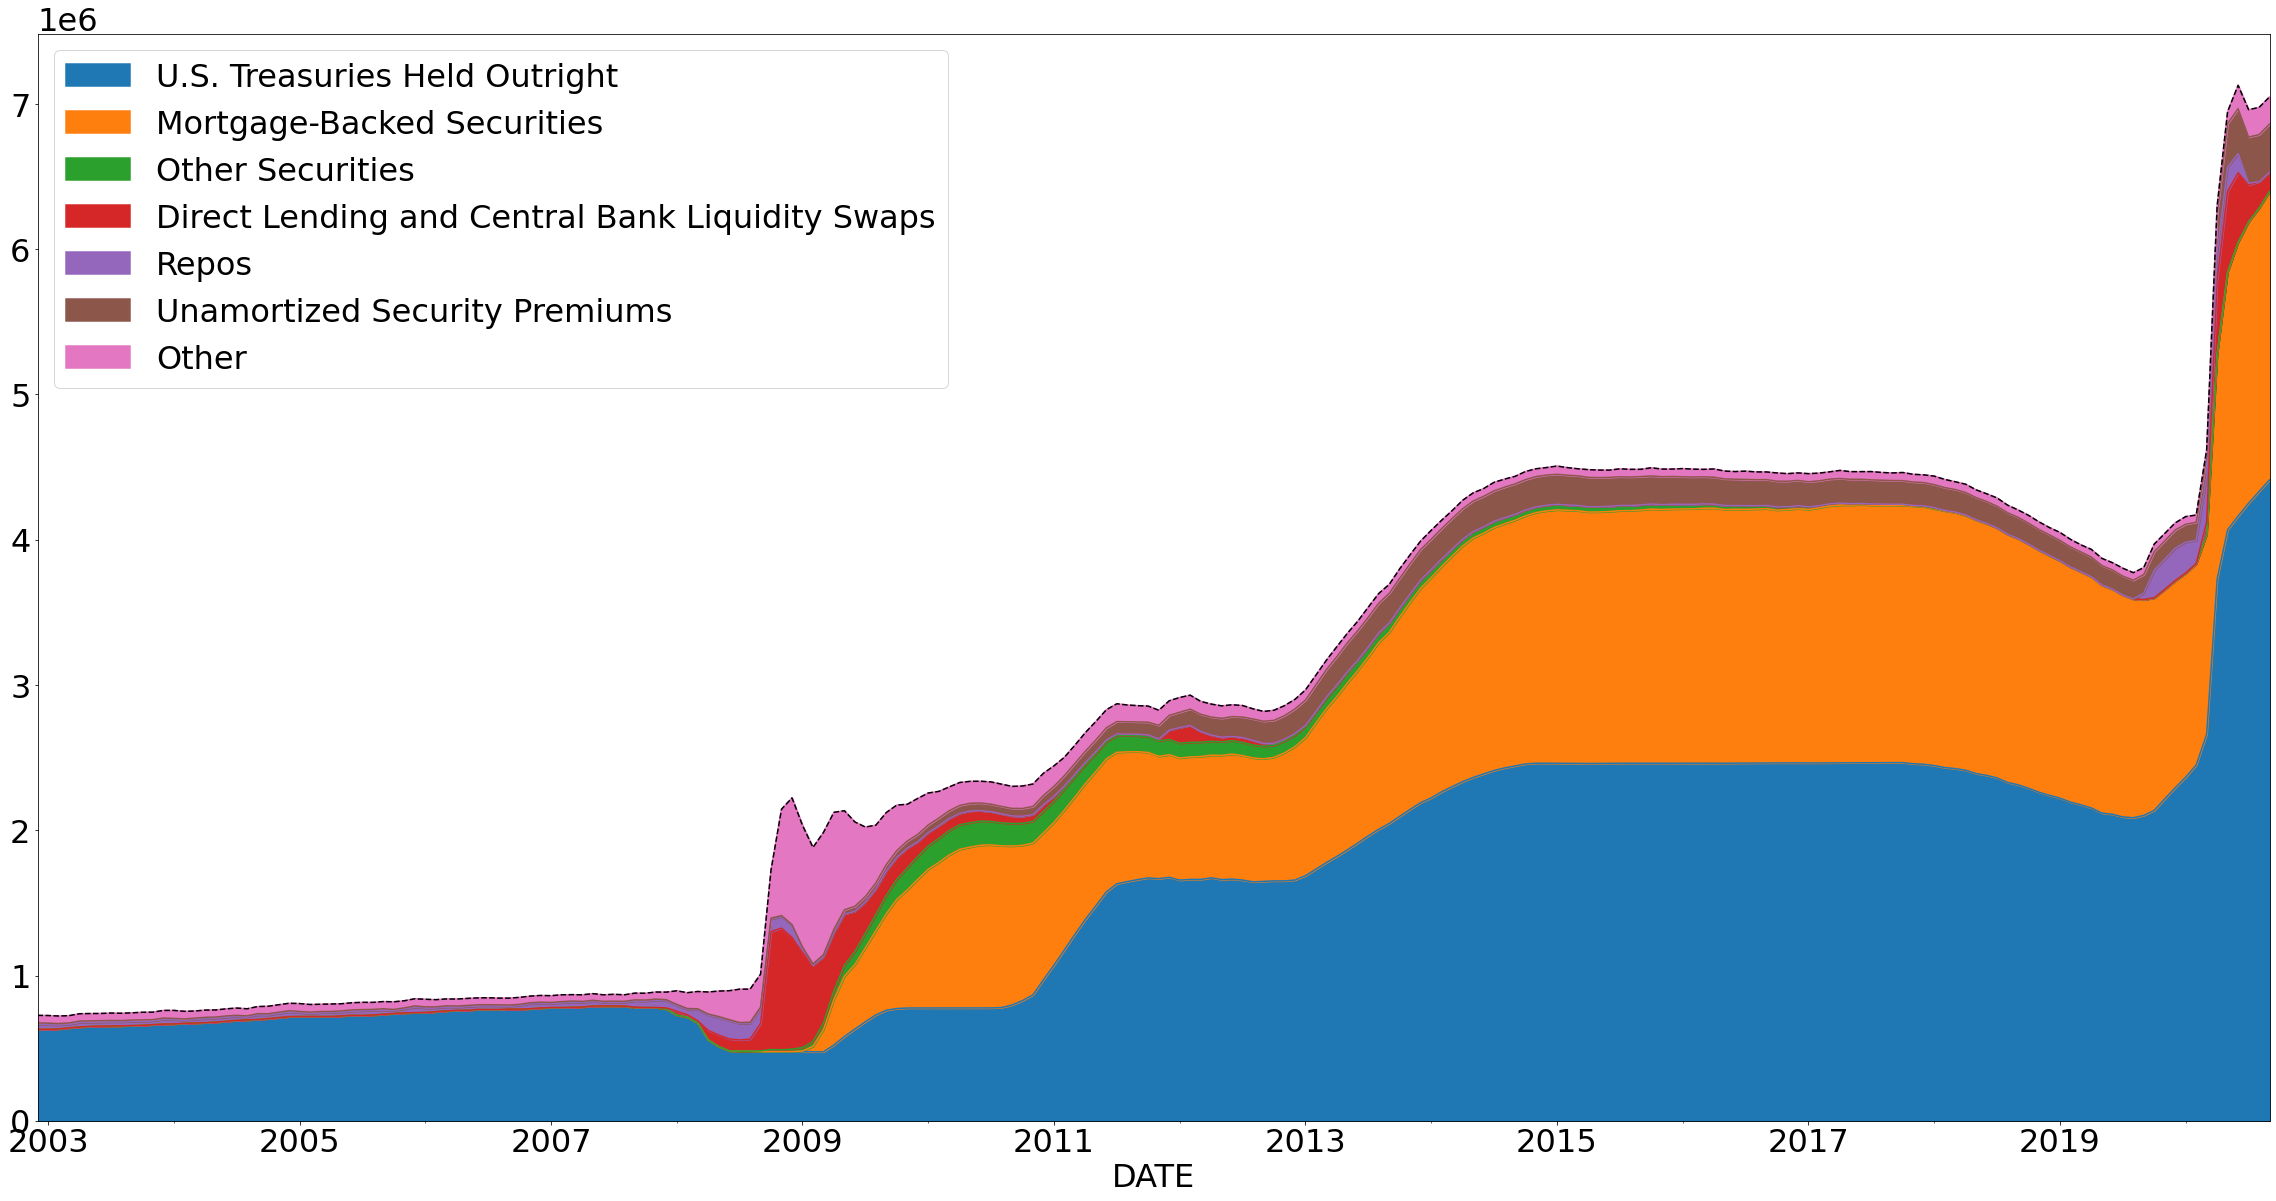

In [29]:
from datlib.plots import *
#fedProject
# . . . 
data["Balance Sheet: Direct Lending and Central Bank Liquidity Swaps"] =\
    data["Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"].add(
    data["Balance Sheet: Direct Lending ($ Mil)"])
data["Balance Sheet: Other Securities"] = data["Balance Sheet: Securities Held Outright ($ Mil)"].sub(
    data["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]).sub(
    data["Balance Sheet: Mortgage-Backed Securities ($ Mil)"])
data["Balance Sheet: Other"] = data["Balance Sheet: Total Assets ($ Mil)"].sub(
    data["Balance Sheet: Securities Held Outright ($ Mil)"]).sub(
    data["Balance Sheet: Direct Lending and Central Bank Liquidity Swaps"]).sub(
    data["Balance Sheet: Repos ($ Mil)"]).sub(
    data["Balance Sheet: Unamortized Security Premiums ($ Mil)"])

account_vars = ["U.S. Treasuries Held Outright",
               "Mortgage-Backed Securities",
               "Other Securities",
               "Direct Lending and Central Bank Liquidity Swaps",
               "Repos",
               "Unamortized Security Premiums",
               "Other"]

rename_data = data.rename(columns = {key: key.replace(
    "Balance Sheet: ", "").replace(" ($ Mil)", "") for key in data.keys()})
plot_stacked_lines(rename_data,
    account_vars, linewidth = 1.5,
    total_var = "Total Assets",
                   title = "Fed Balance Sheet: Assets ($ Mil)")
